# Email Spam Detector

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import library

In [ ]:
!pip3 -q install fasttext
!pip3 -q install wordcloud
!pip -q install textattack
from textattack.transformations import WordSwapRandomCharacterDeletion
from textattack.transformations import CompositeTransformation
from textattack.augmentation import Augmenter

     |████████████████████████████████| 68 kB 3.0 MB/s 
     |████████████████████████████████| 418 kB 5.2 MB/s 
     |████████████████████████████████| 41.4 MB 1.2 MB/s 
     |████████████████████████████████| 3.6 MB 36.1 MB/s 
     |████████████████████████████████| 401 kB 64.9 MB/s 
     |████████████████████████████████| 125 kB 53.7 MB/s 
     |████████████████████████████████| 5.5 MB 34.8 MB/s 
     |████████████████████████████████| 769 kB 67.8 MB/s 
     |████████████████████████████████| 60 kB 6.8 MB/s 
     |████████████████████████████████| 365 kB 58.5 MB/s 
     |████████████████████████████████| 95 kB 4.5 MB/s 
     |████████████████████████████████| 212 kB 49.0 MB/s 
     |████████████████████████████████| 163 kB 68.1 MB/s 
     |████████████████████████████████| 115 kB 48.1 MB/s 
     |████████████████████████████████| 127 kB 59.0 MB/s 
     |████████████████████████████████| 7.6 MB 37.8 MB/s 
     |████████████████████████████████| 1.2 MB 65.2 MB/s 
     |███████████████

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import tensorflow.keras
import datetime
from tensorflow.keras import backend as K
import tensorflow.keras.optimizers as Optimizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, GRU
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, load_model
# import tensorflow_addons as tfa

from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plot
import seaborn as sn
import tensorflow as tf

## Import dataset

Business Understanding:

What is mail spam ?

Spam emails are illegal or unsolicited messages sent through to a large number of users. 

Their primary goal is to lure the user into clicking a malicious link or downloading an attachment that is harmful to the user's machine.

Why classifycation mail spam?

to protect user from malicious email

reduce user distractions when receiving unsolicited emails

Goal: 

build a usable spam classification model

The classification is based on the f1 metric, which is more than 0.9

In [ ]:
# ## TYPE YOUR CODE for task 2 here:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# ## TYPE YOUR CODE for task 3 here:
# %%time
# dataset_path = '/content/gdrive/MyDrive/DSp305/emails_1.csv'

# !cp '{dataset_path}' .

In [ ]:
email_raw = pd.read_csv('https://raw.githubusercontent.com/VuongDS/305/main/emails_1.csv')

In [ ]:
email = email_raw.copy()

Shape of dataset is (5728, 2).
It's conclude two column:
- 'text' contains the content of the email
- 'spam' is label of dataset

In [ ]:
email.shape

(5728, 2)

In [ ]:
email[1365:1375]

,text,spam
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1
1367,Subject: hot stock info : drgv announces anoth...,1
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
1373,Subject: ben zhang any suggestions ? - g - ...,0
1374,Subject: manoj gupta - interview schedule att...,0


In [ ]:
email['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [ ]:
email.isnull().sum()

text    0
spam    0
dtype: int64

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Cleaning the text

In [ ]:
from gensim.utils import simple_preprocess

In [ ]:
# email.iloc[:, 0] = email.iloc[:, 0].apply(lambda x: ' '.join(simple_preprocess(x)))

In [ ]:
email.iloc[:, 0] = email.iloc[:, 0].str.lower()

In [ ]:
email.tail()

,text,spam
5723,subject: re : research and development charges...,0
5724,"subject: re : receipts from visit jim , than...",0
5725,subject: re : enron case study update wow ! a...,0
5726,"subject: re : interest david , please , call...",0
5727,subject: news : aurora 5 . 2 update aurora ve...,0


In [ ]:
email_spam = email[email['spam'] == 1] 
email_not_spam = email[email['spam'] == 0] 

In [ ]:
print(email_spam.shape)
print(email_not_spam.shape)

(1368, 2)
(4360, 2)


In [ ]:
email_spam.head()

,text,spam
0,subject: naturally irresistible your corporate...,1
1,subject: the stock trading gunslinger fanny i...,1
2,subject: unbelievable new homes made easy im ...,1
3,subject: 4 color printing special request add...,1
4,"subject: do not have money , get software cds ...",1


## **Exploratory Data Analysis**

In [ ]:
# Store word in a list:
text_contain_spam = []
for text in email_spam.text:
  text_contain_spam.append(text)


text_contain_not_spam = []
for text in email_not_spam.text:
  text_contain_not_spam.append(text)

In [ ]:
# Conver list to a text file
text_contain_spam = ''.join(text_contain_spam)
text_contain_not_spam = ''.join(text_contain_not_spam)

In [ ]:
print(len(text_contain_spam))
print(len(text_contain_not_spam))

1802008
7115163


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Create stop words set
stops = set(stopwords.words('english'))

In [ ]:
# Update stop words
stops.update(["re", 'ect', 'cc'])

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import collections
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Counter word in the text file
c_spam = collections.Counter(word_tokenize(text_contain_spam))
c_not_spam = collections.Counter(word_tokenize(text_contain_not_spam))

In [ ]:
most_spam = c_spam.most_common()
most_not_spam = c_not_spam.most_common()

In [ ]:
import seaborn as sns

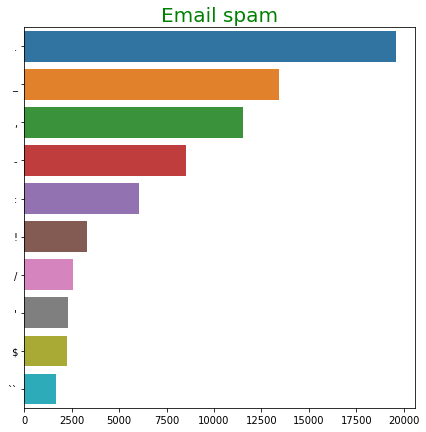

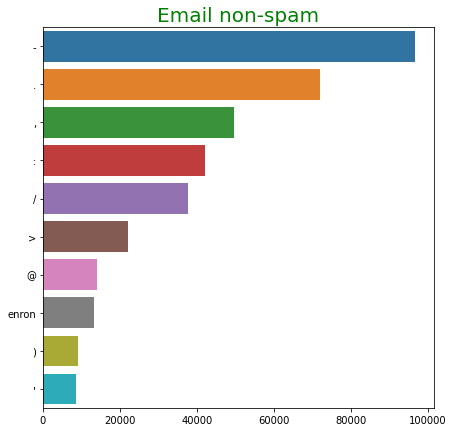

In [ ]:
plt.figure(figsize=(7, 7))

x, y= [], []
for word,count in most_spam[:50]:
    if (word not in stops):
        x.append(word)
        y.append(count)
# x = x[:10]        
sns.barplot(x=y[:10],y=x[:10])
plt.title('Email spam',
          fontsize=20,
          color="green")
plt.show()

plt.figure(figsize=(7, 7))
x, y= [], []
for word,count in most_not_spam[:70]:
    if (word not in stops):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y[:10],y=x[:10])
plt.title('Email non-spam',
          fontsize=20,
          color="green")
plt.show()

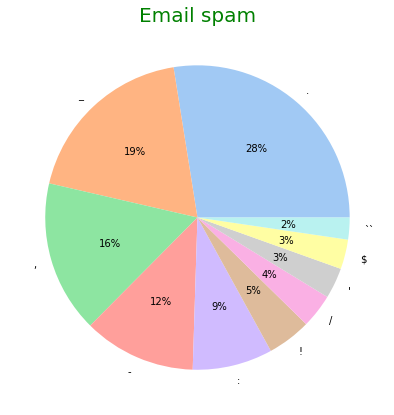

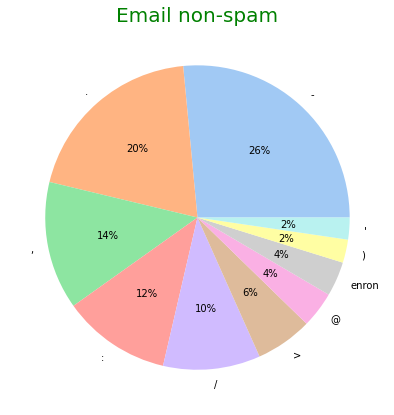

In [ ]:
plt.figure(figsize=(7, 7))

x, y= [], []
for word,count in most_spam[:50]:
    if (word not in stops):
        x.append(word)
        y.append(count)
# x = x[:10]        
colors = sns.color_palette('pastel')[0:10]
plt.pie(y[:10], labels = x[:10], colors = colors, autopct='%.0f%%')
plt.title('Email spam',
          fontsize=20,
          color="green")
# plt.show()

plt.figure(figsize=(7, 7))

x, y= [], []
for word,count in most_not_spam[:70]:
    if (word not in stops):
        x.append(word)
        y.append(count)
        
colors = sns.color_palette('pastel')[0:10]
plt.pie(y[:10], labels = x[:10], colors = colors, autopct='%.0f%%')
plt.title('Email non-spam',
          fontsize=20,
          color="green")
plt.show()

In [ ]:
# Create and generate a word cloud image:
wordcloud_spam = WordCloud(stopwords=stops).generate(text_contain_spam)
wordcloud_not_spam = WordCloud(stopwords=stops).generate(text_contain_not_spam)

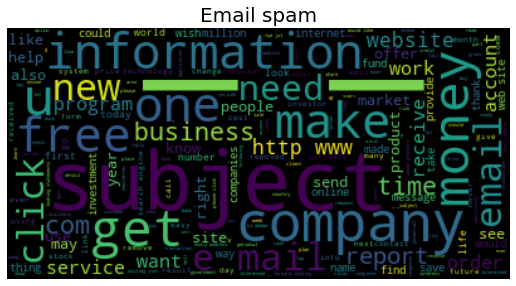

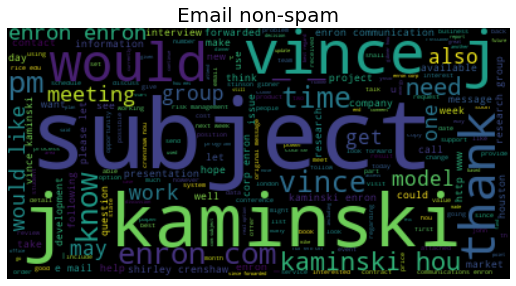

In [ ]:
# Display the generated image:
plt.figure(figsize=(9, 9))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Email spam',
          fontsize=20)
plt.axis("off")
plt.show()

plt.figure(figsize=(9, 9))
plt.imshow(wordcloud_not_spam, interpolation='bilinear')
plt.title('Email non-spam',
          fontsize=20)
plt.axis("off")
plt.show()

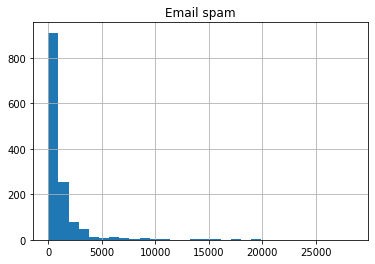

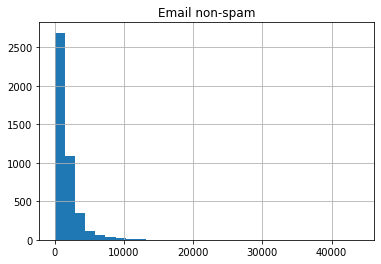

In [ ]:
# Statistic of len of each email:
email_spam['text'].str.len().hist(bins=30)
plt.title('Email spam')
plt.show()

email_not_spam['text'].str.len().hist(bins=30)
plt.title('Email non-spam')
plt.show()

## Creating the Fasttext model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(email['text'], email['spam'], test_size = 0.20, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(4582,)
(1146,)


In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [ ]:
from gensim.utils import simple_preprocess

In [ ]:
# X_train.iloc[:, 0] = X_train.iloc[:, 0].apply(lambda x: ' '.join(simple_preprocess(x)))
# X_test.iloc[:, 0] = X_test.iloc[:, 0].apply(lambda x: ' '.join(simple_preprocess(x)))

In [ ]:
X_train.iloc[:, 0] = X_train.iloc[:, 0].str.lower()
X_test.iloc[:, 0] = X_test.iloc[:, 0].str.lower()

In [ ]:
X_train.head()

,text
4860,subject: re : request for payroll reclassifica...
1520,subject: re : pending approval for ibuyit requ...
2083,subject: congratulations ! hi vince : i just...
527,subject: secretly record all internet activity...
3113,"subject: interviews scheduled for monday , nov..."


In [ ]:
y_train.iloc[:, 0] = y_train.iloc[:, 0].apply(lambda x: '__label__' + str(x))
y_test.iloc[:, 0] = y_test.iloc[:, 0].apply(lambda x: '__label__' + str(x))

In [ ]:
y_train.head()

,spam
4860,__label__0
1520,__label__0
2083,__label__0
527,__label__1
3113,__label__0


In [ ]:
# Create train/test dataset
X_train[['label']] = y_train
X_test[['label']] = y_test

In [ ]:
train_dataset = X_train
test_dataset = X_test

In [ ]:
train_dataset.head()

,text,label
4860,subject: re : request for payroll reclassifica...,__label__0
1520,subject: re : pending approval for ibuyit requ...,__label__0
2083,subject: congratulations ! hi vince : i just...,__label__0
527,subject: secretly record all internet activity...,__label__1
3113,"subject: interviews scheduled for monday , nov...",__label__0


In [ ]:
# !pip3 -q install fasttext
import fasttext
from sklearn.metrics import f1_score

In [ ]:
# Convert dataset to CSV file
train_dataset[['label', 'text']].to_csv('train.txt', 
                                        index = False, 
                                        sep = ' ',
                                        header = None, 
                                        quoting = csv.QUOTE_NONE, 
                                        quotechar = "", 
                                        escapechar = " ")

test_dataset[['label', 'text']].to_csv('test.txt', 
                                        index = False, 
                                        sep = ' ',
                                        header = None, 
                                        quoting = csv.QUOTE_NONE, 
                                        quotechar = "", 
                                        escapechar = " ")

In [ ]:
# Training the fastText classifier
model = fasttext.train_supervised('train.txt', 
                                  wordNgrams = 2)
lst_predict = []
for text in test_dataset.iloc[:, 0]:
  label, pro = model.predict(text)
  lst_predict.append(list(label))
lst_predict = pd.DataFrame(lst_predict)
y_test['spam'] = y_test['spam'].replace(['__label__1'],1)
y_test['spam'] = y_test['spam'].replace(['__label__0'],0)
lst_predict[0] = lst_predict[0].replace(['__label__1'],1)
lst_predict[0] = lst_predict[0].replace(['__label__0'],0)

score_basic = f1_score(y_test, lst_predict, average='binary')

In [ ]:
# a dictionary for keeping all scores of the classifiers
f1 = {'F1 score':{}}

In [ ]:
f1['F1 score']['1.Basic_Param_FasText'] = score_basic
report = pd.DataFrame(f1)
report

,F1 score
1.Basic_Param_FasText,0.834951


## Using LSTM pytorch

In [ ]:
import bz2
from collections import Counter
import re
import nltk
import numpy as np
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
X_train_lst = list(np.squeeze(X_train.iloc[:, 0]))
X_test_lst = list(np.squeeze(X_test.iloc[:, 0]))

In [ ]:
X_train_lst[0]

'subject: re : request for payroll reclassification - approved  joann ,  yes , sorry . 413 was the number on the form i received .  vince  enron property & services corp .  from : joann holloway 01 / 11 / 2000 02 : 01 pm  to : vince j kaminski / hou / ect @ ect  cc :  subject : re : request for payroll reclassification - approved  vince ,  on your reclass information , the company number indicated should be 0011 not  413 .  jo ann holloway  x 35957  vince j kaminski  01 / 11 / 2000 01 : 33 pm  to : stella l ely / hou / ect @ ect  cc : jeff kinneman / hou / ect @ ect , carmen chavira / hou / ect @ ect , michelle  hargrave / hou / ect @ ect , stephen wolfe / hou / ect @ ect , michael s  galvan / hou / ect @ ect , gary mccumber / hou / ect @ ect , billie  akhave / epsc / hou / ect @ ect , joann holloway / epsc / hou / ect @ ect , louis  allen / epsc / hou / ect @ ect , bradley stewart / hou / ect @ ect , carol coats / hou / ect @ ect  subject : request for payroll reclassification - appro

In [ ]:
y_train['spam'] = y_train['spam'].replace(['__label__1'],1)
y_train['spam'] = y_train['spam'].replace(['__label__0'],0)
y_test['spam'] = y_test['spam'].replace(['__label__1'],1)
y_test['spam'] = y_test['spam'].replace(['__label__0'],0)

In [ ]:
words = Counter() #Dictionary that will map a word to the number of times it appeared in all the training sentences
for i, sentence in enumerate(X_train_lst):
    #The sentences will be stored as a list of words/tokens
    X_train_lst[i] = []
    for word in nltk.word_tokenize(sentence): #Tokenizing the words
        words.update([word.lower()]) #Converting all the words to lower case
        X_train_lst[i].append(word)
print("100% done")

100% done


In [ ]:
# Removing the words that only appear once
words = {k:v for k,v in words.items() if v>1}
# Sorting the words according to the number of appearances, with the most common word being first
words = sorted(words, key=words.get, reverse=True)
# Adding padding and unknown to our vocabulary so that they will be assigned an index
words = ['_PAD','_UNK'] + words
# Dictionaries to store the word to index mappings and vice versa
word2idx = {o:i for i,o in enumerate(words)}
idx2word = {i:o for i,o in enumerate(words)}

In [ ]:
for i, sentence in enumerate(X_train_lst):
    # Looking up the mapping dictionary and assigning the index to the respective words
    X_train_lst[i] = [word2idx[word] if word in word2idx else word2idx['_UNK'] for word in sentence]

for i, sentence in enumerate(X_test_lst):
    # For test sentences, we have to tokenize the sentences as well
    X_test_lst[i] = [word2idx[word.lower()] if word.lower() in word2idx else word2idx['_UNK'] for word in nltk.word_tokenize(sentence)]

In [ ]:
# Defining a function that either shortens sentences or pads sentences with 0 to a fixed length

def pad_input(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

In [ ]:
seq_len = 50 #The length that the sentences will be padded/shortened to

train_sentences = pad_input(X_train_lst, seq_len)
test_sentences = pad_input(X_test_lst, seq_len)

In [ ]:
# Converting our labels into numpy arrays
train_labels = np.array(y_train)
test_labels = np.array(y_test)

In [ ]:
type(train_sentences)

numpy.ndarray

In [ ]:
split_frac = 0.5
split_id = int(split_frac * len(test_sentences))
val_sentences, test_sentences = test_sentences[:split_id], test_sentences[split_id:]
val_labels, test_labels = test_labels[:split_id], test_labels[split_id:]

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
train_data = TensorDataset(torch.from_numpy(train_sentences), torch.from_numpy(np.squeeze(train_labels)))
val_data = TensorDataset(torch.from_numpy(val_sentences), torch.from_numpy(np.squeeze(val_labels)))
test_data = TensorDataset(torch.from_numpy(test_sentences), torch.from_numpy(np.squeeze(test_labels)))

batch_size = 5

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True)
val_loader = DataLoader(val_data, shuffle=True, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size, drop_last=True)

In [ ]:
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print(sample_x.shape, sample_y.shape)

torch.Size([5, 50]) torch.Size([5])


In [ ]:
import torch.nn as nn

class SentimentNet(nn.Module):
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        super(SentimentNet, self).__init__()
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x, hidden):
        batch_size = x.size(0)
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        out = self.dropout(lstm_out)
        out = self.fc(out)
        out = self.sigmoid(out)
        
        out = out.view(batch_size, -1)
        out = out[:,-1]
        return out, hidden
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device))
        return hidden

In [ ]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU not available, CPU used


In [ ]:
vocab_size = len(word2idx) + 1
output_size = 1
embedding_dim = 400
hidden_dim = 512
n_layers = 2

model = SentimentNet(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
model.to(device)
print(model)

SentimentNet(
  (embedding): Embedding(20080, 400)
  (lstm): LSTM(400, 512, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [ ]:
lr=0.005
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
# epochs = 10
# counter = 0
# print_every = 1000
# clip = 5
# valid_loss_min = np.Inf

# model.train()
# for i in range(epochs):
#     h = model.init_hidden(batch_size)
    
#     for inputs, labels in train_loader:
#         counter += 1
#         h = tuple([e.data for e in h])
#         inputs, labels = inputs.to(device), labels.to(device)
#         model.zero_grad()
#         output, h = model(inputs, h)
#         # loss = criterion(output.squeeze(), labels.float())
#         loss = criterion(output.squeeze(), labels.float())
#         loss.backward()
#         nn.utils.clip_grad_norm_(model.parameters(), clip)
#         optimizer.step()
        
#         if counter%print_every == 0:
#             val_h = model.init_hidden(batch_size)
#             val_losses = []
#             model.eval()
#             for inp, lab in val_loader:
#                 val_h = tuple([each.data for each in val_h])
#                 inp, lab = inp.to(device), lab.to(device)
#                 out, val_h = model(inp, val_h)
#                 val_loss = criterion(out.squeeze(), lab.float())
#                 val_losses.append(val_loss.item())
                
#             model.train()
#             print("Epoch: {}/{}...".format(i+1, epochs),
#                   "Step: {}...".format(counter),
#                   "Loss: {:.6f}...".format(loss.item()),
#                   "Val Loss: {:.6f}".format(np.mean(val_losses)))
#             if np.mean(val_losses) <= valid_loss_min:
#                 torch.save(model.state_dict(), './state_dict.pt')
#                 print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,np.mean(val_losses)))
#                 valid_loss_min = np.mean(val_losses)

In [ ]:
## TYPE YOUR CODE for task 2 here:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
## TYPE YOUR CODE for task 3 here:
%%time
dataset_path = '/content/gdrive/MyDrive/DSp305/state_dict_2.pt'

!cp '{dataset_path}' .

CPU times: user 32.6 ms, sys: 42 ms, total: 74.6 ms
Wall time: 2.35 s


In [ ]:
#Loading the best model
model.load_state_dict(torch.load('./state_dict_2.pt'))

<All keys matched successfully>

In [ ]:
pred_label = []
true_label = []
h = model.init_hidden(batch_size)

for inputs, labels in test_loader:
    h = tuple([each.data for each in h])
    inputs, labels = inputs.to(device), labels.to(device)
    output, h = model(inputs, h)
    pred = torch.round(output.squeeze()) #rounds the output to 0/1
    pred_label.append(pred.int())
    true_label.append(labels.int())
    # print(pred.float(), labels.float())

In [ ]:
tensor_pred = torch.tensor(())
for i in pred_label:
  tensor_pred = torch.cat((tensor_pred, i), 0)

tensor_true = torch.tensor(())
for i in true_label:
  tensor_true = torch.cat((tensor_true, i), 0)

In [ ]:
lst_pred = tensor_pred.tolist()
lst_true = tensor_true.tolist()

In [ ]:
score_basic_LSTM = f1_score(tensor_true, tensor_pred, average='binary')

In [ ]:
f1['F1 score']['2.Basic_LSTM_Pytorch'] = score_basic_LSTM
report = pd.DataFrame(f1)
report

,F1 score
1.Basic_Param_FasText,0.834951
2.Basic_LSTM_Pytorch,0.918519


## **Tuning**

In [ ]:
# wordNgramss = [2, 3, 4]
# lr = [1.3, 1.5, 1.7, 1.9, 2.1]
# epoch = [23, 25, 27, 29, 31]
# ws = [2, 4, 5, 6, 7, 8, 9, 10]

# best_f1 = 0

# for i_wordNgramss in wordNgramss:
#   for i_lr in lr:
#     for i_epoch in epoch:
#       for i_ws in ws:
#         print('wordNgrams: ',i_wordNgramss,'lr: ',i_lr,'i_epoch: ',i_epoch, 'i_ws: ',i_ws)
#         model_tune = fasttext.train_supervised(
#                                   'train.txt', 
#                                   wordNgrams = i_wordNgramss, # number of words in a unit train
#                                   lr = i_lr, # learning rate
#                                   epoch = i_epoch, # epoch
#                                   loss = 'hs', # hierarchical softmax, use for text classification, can speed up training
#                                   ws = i_ws # size of the context window
#                                   )
#         print(model_tune.test('test.txt'))
#         if model_tune.test('test.txt')[1] > best_f1:
#           best_f1 = model_tune.test('test.txt')[1]
#           best_wordNgrams = i_wordNgramss
#           best_lr = i_lr
#           best_epoch = i_epoch
#           best_ws = i_ws
# print('best_f1: ',best_f1, 'wordNgrams: ',best_wordNgrams, 'lr: ', best_lr, 'i_epoch: ',best_epoch, 'i_ws: ',best_ws)

In [ ]:
model_tune = fasttext.train_supervised(
                          'train.txt', 
                          wordNgrams = 3, # number of words in a unit train
                          lr = 1.9, # learning rate
                          epoch = 23, # epoch
                          loss = 'hs' # hierarchical softmax, use for text classification, can speed up training
                          )
lst_tune_predict = []
for text in test_dataset.iloc[:, 0]:
  label, pro = model_tune.predict(text)
  lst_tune_predict.append(list(label))

lst_tune_predict = pd.DataFrame(lst_tune_predict)

y_test['spam'] = y_test['spam'].replace(['__label__1'],1)
y_test['spam'] = y_test['spam'].replace(['__label__0'],0)
lst_tune_predict[0] = lst_tune_predict[0].replace(['__label__1'],1)
lst_tune_predict[0] = lst_tune_predict[0].replace(['__label__0'],0)

score = f1_score(y_test, lst_tune_predict, average='binary')
score

0.9737302977232926

In [ ]:
f1['F1 score']['3.Tune_Word_Fasttext'] = score
report = pd.DataFrame(f1)
report

,F1 score
1.Basic_Param_FasText,0.834951
2.Basic_LSTM_Pytorch,0.918519
3.Tune_Word_Fasttext,0.973730


In [ ]:
# # char level
# wordNgramss = [1]
# lr = [1.3, 1.5, 1.7, 1.9, 2.1]
# epoch = [23, 25, 27, 29, 31]
# ws = [2, 4, 5, 6, 7, 8, 9, 10]
# char_ngram = [2, 3, 4, 5, 6, 7, 8]

# best_f1 = 0

# for i_wordNgramss in wordNgramss:
#   for i_lr in lr:
#     for i_epoch in epoch:
#       for i_ws in ws:
#         for i_char in char_ngram:
#           print('wordNgrams: ',i_wordNgramss,'lr: ',i_lr,'i_epoch: ',i_epoch, 'i_ws: ',i_ws, 'i_char: ',i_char)
#           model_tune = fasttext.train_supervised(
#                                     'train.txt', 
#                                     wordNgrams = i_wordNgramss, # number of words in a unit train
#                                     lr = i_lr, # learning rate
#                                     epoch = i_epoch, # epoch
#                                     loss = 'hs', # hierarchical softmax, use for text classification, can speed up training
#                                     ws = i_ws, # size of the context window
#                                     minn = i_char, # min length of char ngrams
#                                     maxn = i_char # max length of char ngrams
#                                     )
#           print(model_tune.test('test.txt'))
#           if model_tune.test('test.txt')[1] > best_f1:
#             best_f1 = model_tune.test('test.txt')[1]
#             best_wordNgrams = i_wordNgramss
#             best_lr = i_lr
#             best_epoch = i_epoch
#             best_ws = i_ws
#             best_i_char = i_char
# print('best_f1: ',best_f1, 'wordNgrams: ',best_wordNgrams, 'lr: ', best_lr, 'i_epoch: ',best_epoch, 'i_ws: ',best_ws, 'best_char: ',best_i_char)

In [ ]:
model_char_tune = fasttext.train_supervised(
                          'train.txt', 
                          wordNgrams = 1, # number of words in a unit train
                          lr = 1.3, # learning rate
                          epoch = 23, # epoch
                          minn = 5, # min length of char ngrams
                          maxn = 5 # max length of char ngrams
                          )

lst_tune_char_predict = []
for text in test_dataset.iloc[:, 0]:
  label, pro = model_char_tune.predict(text)
  lst_tune_char_predict.append(list(label))

lst_tune_char_predict = pd.DataFrame(lst_tune_char_predict)
y_test['spam'] = y_test['spam'].replace(['__label__1'],1)
y_test['spam'] = y_test['spam'].replace(['__label__0'],0)
lst_tune_char_predict[0] = lst_tune_char_predict[0].replace(['__label__1'],1)
lst_tune_char_predict[0] = lst_tune_char_predict[0].replace(['__label__0'],0)

score = f1_score(y_test, lst_tune_char_predict, average='binary')
score

0.9895833333333334

In [ ]:
f1['F1 score']['4.Tune_Char_Fasttext'] = score
report = pd.DataFrame(f1)
report

,F1 score
1.Basic_Param_FasText,0.834951
2.Basic_LSTM_Pytorch,0.918519
3.Tune_Word_Fasttext,0.973730
4.Tune_Char_Fasttext,0.989583


## error analysis

In [ ]:
# for i in y_test['spam']:
# for i in lst_predict[0]:
#   print(i )

In [ ]:
y_test.index[146]

168

In [ ]:
email.iloc[[168]]

,text,spam
168,subject: i would like to help your marketing e...,1


In [ ]:
for i in email.iloc[[168]]['text']:
  print(i)

subject: i would like to help your marketing efforts !  hello fellow entrepreneur ,  my name is jon roberts and i represent one of the largest  lead companies on the internet . we specialize in national , local area code , and  gender based real time leads . we also run custom marketing campaigns for  organizations that want a more targeted lead due to their line of service or  product .  you can reach me at the number below or simply reply to  this email . we hope to serve you soon - thanks ! jonathan  robertsl - 800 - 663 - 0311 theleadmanl @ yahoo . com * if you have received  this message in error or would like to be removed from the mailing list please  reply to this email with your removal request and it will be processed  immediately ! *


In [ ]:
email.head()

,text,spam
0,subject: naturally irresistible your corporate...,1
1,subject: the stock trading gunslinger fanny i...,1
2,subject: unbelievable new homes made easy im ...,1
3,subject: 4 color printing special request add...,1
4,"subject: do not have money , get software cds ...",1


In [ ]:
email_ea = email.copy()

In [ ]:
email_ea.at[2239, 'spam'] = 0
email_ea.at[1180, 'spam'] = 0
email_ea.at[499, 'spam'] = 0
email_ea.at[737, 'spam'] = 0
email_ea.at[882, 'spam'] = 0
email_ea.at[401, 'spam'] = 0
email_ea.at[1086, 'spam'] = 0

# email_ea.at[1181, 'spam'] = 0
# email_ea.at[3523, 'spam'] = 1
# email_ea.at[3728, 'spam'] = 1
# email_ea.at[3513, 'spam'] = 1

In [ ]:
# email_ea.to_csv('/content/email_analyse.csv')  

In [ ]:
email_ea.iloc[[1086]]

,text,spam
1086,subject: judicial judgements child support ve...,0


## Augmentation data

In [ ]:
X_train_au, X_test_au, y_train_au, y_test_au = train_test_split(email_ea['text'], email_ea['spam'], test_size = 0.20, random_state = 42)
X_train_au = pd.DataFrame(X_train_au)
X_test_au = pd.DataFrame(X_test_au)
y_train_au = pd.DataFrame(y_train_au)
y_test_au = pd.DataFrame(y_test_au)
y_train_au.iloc[:, 0] = y_train_au.iloc[:, 0].apply(lambda x: '__label__' + str(x))
y_test_au.iloc[:, 0] = y_test_au.iloc[:, 0].apply(lambda x: '__label__' + str(x))

In [ ]:
# my_transformation = CompositeTransformation([WordSwapRandomCharacterDeletion()])
# augmenter = Augmenter(transformation=my_transformation, transformations_per_example=3)


# def new_train(train_dts):
#   new_train_dts = []
#   for text in train_dts['text']:
#     new_train_dts.append(augmenter.augment(text))
    
#   new_train_dts = pd.DataFrame(np.ravel(new_train_dts))
#   return new_train_dts

In [ ]:
text = email_ea.loc[[907, 71, 2842, 2663, 538, 2905, 805, 4089, 4573, 79, 5408, 1411, 1086]]

In [ ]:
# X_train_au = new_train(X_train_au_1)

In [ ]:
# from textattack.augmentation import WordNetAugmenter
# wordnet_aug = WordNetAugmenter()

In [ ]:
# def new_train(train_dts):
#   new_train_dts = []
#   for text in train_dts['text']:
#     new_train_dts.append(wordnet_aug.augment(text))
    
#   new_train_dts = pd.DataFrame(np.ravel(new_train_dts))
#   return new_train_dts

In [ ]:
# au = new_train(text)

In [ ]:
!wget -q https://raw.githubusercontent.com/VuongDS/305/main/train_au_final.csv

In [ ]:
dts_au = pd.read_csv('/content/train_au_final.csv', header = None)
dts_au = dts_au.rename(columns={0: "text", 1: "spam"})

In [ ]:
dts_au['spam'].value_counts()

1    190
0    190
Name: spam, dtype: int64

In [ ]:
dts_au.head(3)

,text,spam
0,subject ...,1
1,subject ...,1
2,subject ...,1


In [ ]:
X_train_au = X_train_au.append(dts_au[['text']], ignore_index=True)

In [ ]:
dts_au['spam'] = dts_au['spam'].apply(lambda x: '__label__' + str(x))

In [ ]:
X_train_au.shape

(4962, 1)

In [ ]:
y_train_au = y_train_au.append(dts_au[['spam']], ignore_index=True)

In [ ]:
# Create train/test dataset
X_train_au[['label']] = y_train_au
X_test_au[['label']] = y_test_au
train_dataset = X_train_au
test_dataset = X_test_au

# Convert dataset to CSV file
train_dataset[['label', 'text']].to_csv('train.txt', 
                                        index = False, 
                                        sep = ' ',
                                        header = None, 
                                        quoting = csv.QUOTE_NONE, 
                                        quotechar = "", 
                                        escapechar = " ")

test_dataset[['label', 'text']].to_csv('test.txt', 
                                        index = False, 
                                        sep = ' ',
                                        header = None, 
                                        quoting = csv.QUOTE_NONE, 
                                        quotechar = "", 
                                        escapechar = " ")

In [ ]:
# Convert dataset to CSV file
# dts_au.to_csv('train_au_final.csv', 
#                   index = False, 
#                   sep = ',',
#                   header = None, 
#                   quoting = csv.QUOTE_NONE, 
#                   quotechar = "", 
#                   escapechar = " ")

## train after analyse fasttext

In [ ]:
# wordNgramss = [2, 3, 4]
# lr = [0.3, 0.5, 0.7, 1.3, 1.5, 1.7, 1.9, 2.1]
# epoch = [23, 25, 27]
# # ws = [2, 4, 5, 6, 7, 8, 9, 10]

# best_f1 = 0

# for i_wordNgramss in wordNgramss:
#   for i_lr in lr:
#     for i_epoch in epoch:
#       # for i_ws in ws:
#         # print('wordNgrams: ',i_wordNgramss,'lr: ',i_lr,'i_epoch: ',i_epoch, 'i_ws: ',i_ws)
#         print('wordNgrams: ',i_wordNgramss,'lr: ',i_lr,'i_epoch: ',i_epoch)
#         model_tune = fasttext.train_supervised(
#                                   'train.txt', 
#                                   wordNgrams = i_wordNgramss, # number of words in a unit train
#                                   lr = i_lr, # learning rate
#                                   epoch = i_epoch, # epoch
#                                   loss = 'hs' # hierarchical softmax, use for text classification, can speed up training
#                                   # ws = i_ws # size of the context window
#                                   )
#         lst_tune_char_predict_ea = []
#         for text in test_dataset.iloc[:, 0]:
#           label, pro = model_tune.predict(text)
#           lst_tune_char_predict_ea.append(list(label))

#         lst_tune_char_predict_ea = pd.DataFrame(lst_tune_char_predict_ea)
#         y_test_au['spam'] = y_test_au['spam'].replace(['__label__1'],1)
#         y_test_au['spam'] = y_test_au['spam'].replace(['__label__0'],0)
#         lst_tune_char_predict_ea[0] = lst_tune_char_predict_ea[0].replace(['__label__1'],1)
#         lst_tune_char_predict_ea[0] = lst_tune_char_predict_ea[0].replace(['__label__0'],0)
#         f1 = f1_score(y_test_au, lst_tune_char_predict_ea, average='binary')


#         print(f1)
#         if f1 > best_f1:
#           best_f1 = f1
#           best_wordNgrams = i_wordNgramss
#           best_lr = i_lr
#           best_epoch = i_epoch
#           # best_ws = i_ws
# # print('best_f1: ',best_f1, 'wordNgrams: ',best_wordNgrams, 'lr: ', best_lr, 'i_epoch: ',best_epoch, 'i_ws: ',best_ws)
# print('best_f1: ',best_f1, 'wordNgrams: ',best_wordNgrams, 'lr: ', best_lr, 'i_epoch: ',best_epoch)

In [ ]:
# ws = [2, 4, 5, 6, 7, 8, 9, 10]

# best_f1 = 0


# for i_ws in ws:
#   print('i_ws: ',i_ws)
#   model_tune = fasttext.train_supervised(
#                             'train.txt', 
#                             wordNgrams = 2, # number of words in a unit train
#                             lr = 1.9, # learning rate
#                             epoch = 25, # epoch
#                             loss = 'hs', # hierarchical softmax, use for text classification, can speed up training
#                             ws = i_ws # size of the context window
#                             )
#   lst_tune_char_predict_ea = []
#   for text in test_dataset.iloc[:, 0]:
#     label, pro = model_tune.predict(text)
#     lst_tune_char_predict_ea.append(list(label))

#   lst_tune_char_predict_ea = pd.DataFrame(lst_tune_char_predict_ea)
#   y_test_au['spam'] = y_test_au['spam'].replace(['__label__1'],1)
#   y_test_au['spam'] = y_test_au['spam'].replace(['__label__0'],0)
#   lst_tune_char_predict_ea[0] = lst_tune_char_predict_ea[0].replace(['__label__1'],1)
#   lst_tune_char_predict_ea[0] = lst_tune_char_predict_ea[0].replace(['__label__0'],0)
#   f1 = f1_score(y_test_au, lst_tune_char_predict_ea, average='binary')


#   print(f1)
#   if f1 > best_f1:
#     best_ws = i_ws
# print('best_f1: ', best_f1, 'i_ws: ', best_ws)
# # print('best_f1: ',best_f1, 'wordNgrams: ',best_wordNgrams, 'lr: ', best_lr, 'i_epoch: ',best_epoch)

In [ ]:
# lst_tune_predict_ea.value_counts()

In [ ]:
model_tune = fasttext.train_supervised(
                          'train.txt', 
                          wordNgrams = 3, # number of words in a unit train
                          lr = 1.3, # learning rate
                          epoch = 23, # epoch
                          loss = 'hs' # hierarchical softmax, use for text classification, can speed up training
                          )

lst_tune_predict_ea = []
for text in test_dataset.iloc[:, 0]:
  label, pro = model_tune.predict(text)
  lst_tune_predict_ea.append(list(label))

lst_tune_predict_ea = pd.DataFrame(lst_tune_predict_ea)
y_test_au['spam'] = y_test_au['spam'].replace(['__label__1'],1)
y_test_au['spam'] = y_test_au['spam'].replace(['__label__0'],0)
lst_tune_predict_ea[0] = lst_tune_predict_ea[0].replace(['__label__1', '__label__1.0'],1)
lst_tune_predict_ea[0] = lst_tune_predict_ea[0].replace(['__label__0', '__label__0.0'],0)
score = f1_score(y_test_au, lst_tune_predict_ea, average='binary')

In [ ]:
f1['F1 score']['5.Error_Analysis_Word_Fasttext'] = score
report = pd.DataFrame(f1)
report

,F1 score
1.Basic_Param_FasText,0.834951
2.Basic_LSTM_Pytorch,0.918519
3.Tune_Word_Fasttext,0.973730
4.Tune_Char_Fasttext,0.989583
5.Error_Analysis_Word_Fasttext,0.982394


In [ ]:
# for i in y_test_au['spam']:
# for i in lst_tune_predict_ea[0]:
#   print(i )

In [ ]:
# y_test.index[295]

In [ ]:
# email_raw.iloc[[5408]]

In [ ]:
# for i in email_raw.iloc[[5408]]['text']:
#   print(i)

In [ ]:
# #char level
# wordNgramss = [1]
# lr = [1.3, 1.5, 1.7, 1.9, 2.1]
# epoch = [23, 25, 27, 29, 31]
# ws = [2, 4, 5, 6, 7, 8, 9, 10]
# char_ngram = [2, 3, 4, 5, 6, 7, 8]

# best_f1 = 0

# for i_wordNgramss in wordNgramss:
#   for i_lr in lr:
#     for i_epoch in epoch:
#       for i_ws in ws:
#         for i_char in char_ngram:
#           print('wordNgrams: ',i_wordNgramss,'lr: ',i_lr,'i_epoch: ',i_epoch, 'i_ws: ',i_ws, 'i_char: ',i_char)
#           model_tune = fasttext.train_supervised(
#                                     'train.txt', 
#                                     wordNgrams = i_wordNgramss, # number of words in a unit train
#                                     lr = i_lr, # learning rate
#                                     epoch = i_epoch, # epoch
#                                     loss = 'hs', # hierarchical softmax, use for text classification, can speed up training
#                                     ws = i_ws, # size of the context window
#                                     minn = i_char, # min length of char ngrams
#                                     maxn = i_char # max length of char ngrams
#                                     )
#           print(model_tune.test('test.txt'))
#           if model_tune.test('test.txt')[1] > best_f1:
#             best_f1 = model_tune.test('test.txt')[1]
#             best_wordNgrams = i_wordNgramss
#             best_lr = i_lr
#             best_epoch = i_epoch
#             best_ws = i_ws
#             best_i_char = i_char
# print('best_f1: ',best_f1, 'wordNgrams: ',best_wordNgrams, 'lr: ', best_lr, 'i_epoch: ',best_epoch, 'i_ws: ',best_ws, 'best_char: ',best_i_char)

In [ ]:
model_char_tune = fasttext.train_supervised(
                          'train.txt', 
                          wordNgrams = 1, # number of words in a unit train
                          lr = 1.3, # learning rate
                          epoch = 23, # epoch
                          minn = 5, # min length of char ngrams
                          maxn = 5 # max length of char ngrams
                          )

lst_tune_char_predict = []
for text in test_dataset.iloc[:, 0]:
  label, pro = model_char_tune.predict(text)
  lst_tune_char_predict.append(list(label))

lst_tune_char_predict = pd.DataFrame(lst_tune_char_predict)
y_test_au['spam'] = y_test_au['spam'].replace(['__label__1'],1)
y_test_au['spam'] = y_test_au['spam'].replace(['__label__0'],0)
lst_tune_char_predict[0] = lst_tune_char_predict[0].replace(['__label__1', '__label__1.0'],1)
lst_tune_char_predict[0] = lst_tune_char_predict[0].replace(['__label__0', '__label__0.0'],0)

score = f1_score(y_test_au, lst_tune_char_predict, average='binary')

In [ ]:
f1['F1 score']['6.Error_Analysis_Char_Fasttext'] = score
report = pd.DataFrame(f1)
report

,F1 score
1.Basic_Param_FasText,0.834951
2.Basic_LSTM_Pytorch,0.918519
3.Tune_Word_Fasttext,0.973730
4.Tune_Char_Fasttext,0.989583
5.Error_Analysis_Word_Fasttext,0.982394
6.Error_Analysis_Char_Fasttext,0.998255


In [ ]:
# for i in y_test_au['spam']:
# for i in lst_tune_char_predict[0]:
#   print(i )

In [ ]:
# y_test.index[45]

In [ ]:
# email_ea.iloc[[1181]]

In [ ]:
# for i in email_ea.iloc[[1181]]['text']:
#   print(i)

## train after analyse LSTM pytorch

In [ ]:
X_train_lst = list(np.squeeze(X_train_au.iloc[:, 0]))
X_test_lst = list(np.squeeze(X_test_au.iloc[:, 0]))

In [ ]:
type(X_train_lst[0])

str

In [ ]:
words = Counter() #Dictionary that will map a word to the number of times it appeared in all the training sentences
for i, sentence in enumerate(X_train_lst):
    #The sentences will be stored as a list of words/tokens
    X_train_lst[i] = []
    for word in nltk.word_tokenize(sentence): #Tokenizing the words
        words.update([word.lower()]) #Converting all the words to lower case
        X_train_lst[i].append(word)
print("100% done")

100% done


In [ ]:
# Removing the words that only appear once
words = {k:v for k,v in words.items() if v>1}
# Sorting the words according to the number of appearances, with the most common word being first
words = sorted(words, key=words.get, reverse=True)
# Adding padding and unknown to our vocabulary so that they will be assigned an index
words = ['_PAD','_UNK'] + words
# Dictionaries to store the word to index mappings and vice versa
word2idx = {o:i for i,o in enumerate(words)}
idx2word = {i:o for i,o in enumerate(words)}

In [ ]:
for i, sentence in enumerate(X_train_lst):
    # Looking up the mapping dictionary and assigning the index to the respective words
    X_train_lst[i] = [word2idx[word] if word in word2idx else word2idx['_UNK'] for word in sentence]

for i, sentence in enumerate(X_test_lst):
    # For test sentences, we have to tokenize the sentences as well
    X_test_lst[i] = [word2idx[word.lower()] if word.lower() in word2idx else word2idx['_UNK'] for word in nltk.word_tokenize(sentence)]

In [ ]:
# Defining a function that either shortens sentences or pads sentences with 0 to a fixed length

def pad_input(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

In [ ]:
seq_len = 50 #The length that the sentences will be padded/shortened to

train_sentences = pad_input(X_train_lst, seq_len)
test_sentences = pad_input(X_test_lst, seq_len)

In [ ]:
y_train_au['spam'] = pd.DataFrame(y_train_au['spam'].replace(['__label__1'],1))
y_train_au['spam'] = pd.DataFrame(y_train_au['spam'].replace(['__label__0'],0))
y_test_au['spam'] = pd.DataFrame(y_test_au['spam'].replace(['__label__1'],1))
y_test_au['spam'] = pd.DataFrame(y_test_au['spam'].replace(['__label__0'],0))

In [ ]:
# Converting our labels into numpy arrays
train_labels_au = np.array(y_train_au)
test_labels_au = np.array(y_test_au)

In [ ]:
split_frac = 0.5
split_id = int(split_frac * len(test_sentences))
val_sentences, test_sentences = test_sentences[:split_id], test_sentences[split_id:]
val_labels_au, test_labels_au = test_labels_au[:split_id], test_labels_au[split_id:]

In [ ]:
# train_sentences=np.vstack(train_sentences).astype(np.float64)
# test_sentences=np.vstack(test_sentences).astype(np.float64)
# val_sentences=np.vstack(val_sentences).astype(np.float64)

# train_labels_au=np.vstack(train_labels_au).astype(np.float64)
# test_labels_au=np.vstack(test_labels_au).astype(np.float64)
# val_labels_au=np.vstack(val_labels_au).astype(np.float64)

In [ ]:
pd.DataFrame(train_labels_au).value_counts()

0    3697
1    1265
dtype: int64

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
train_data = TensorDataset(torch.from_numpy(train_sentences), torch.from_numpy(np.squeeze(train_labels_au)))
val_data = TensorDataset(torch.from_numpy(val_sentences), torch.from_numpy(np.squeeze(val_labels_au)))
test_data = TensorDataset(torch.from_numpy(test_sentences), torch.from_numpy(np.squeeze(test_labels_au)))

batch_size = 5

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True)
val_loader = DataLoader(val_data, shuffle=True, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size, drop_last=True)

In [ ]:
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print(sample_x.shape, sample_y.shape)

torch.Size([5, 50]) torch.Size([5])


In [ ]:
import torch.nn as nn

class SentimentNet(nn.Module):
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        super(SentimentNet, self).__init__()
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x, hidden):
        batch_size = x.size(0)
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        out = self.dropout(lstm_out)
        out = self.fc(out)
        out = self.sigmoid(out)
        
        out = out.view(batch_size, -1)
        out = out[:,-1]
        return out, hidden
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device))
        return hidden

In [ ]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU not available, CPU used


In [ ]:
vocab_size = len(word2idx) + 1
output_size = 1
embedding_dim = 400
hidden_dim = 512
n_layers = 2

model = SentimentNet(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
model.to(device)
print(model)

SentimentNet(
  (embedding): Embedding(20983, 400)
  (lstm): LSTM(400, 512, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [ ]:
lr=0.005
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
# epochs = 10
# counter = 0
# print_every = 1000
# clip = 5
# valid_loss_min = np.Inf

# model.train()
# for i in range(epochs):
#     h = model.init_hidden(batch_size)
    
#     for inputs, labels in train_loader:
#         counter += 1
#         h = tuple([e.data for e in h])
#         inputs, labels = inputs.to(device), labels.to(device)
#         model.zero_grad()
#         output, h = model(inputs, h)
#         # loss = criterion(output.squeeze(), labels.float())
#         loss = criterion(output.squeeze(), labels.float())
#         loss.backward()
#         nn.utils.clip_grad_norm_(model.parameters(), clip)
#         optimizer.step()
        
#         if counter%print_every == 0:
#             val_h = model.init_hidden(batch_size)
#             val_losses = []
#             model.eval()
#             for inp, lab in val_loader:
#                 val_h = tuple([each.data for each in val_h])
#                 inp, lab = inp.to(device), lab.to(device)
#                 out, val_h = model(inp, val_h)
#                 val_loss = criterion(out.squeeze(), lab.float())
#                 val_losses.append(val_loss.item())
                
#             model.train()
#             print("Epoch: {}/{}...".format(i+1, epochs),
#                   "Step: {}...".format(counter),
#                   "Loss: {:.6f}...".format(loss.item()),
#                   "Val Loss: {:.6f}".format(np.mean(val_losses)))
#             if np.mean(val_losses) <= valid_loss_min:
#                 torch.save(model.state_dict(), '/content/gdrive/MyDrive/DSp305/state_dict_ea.pt')
#                 print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,np.mean(val_losses)))
#                 valid_loss_min = np.mean(val_losses)

In [ ]:
# ## TYPE YOUR CODE for task 3 here:
# %%time
# dataset_path = '/content/gdrive/MyDrive/DSp305/state_dict_ea.pt'

# !cp '{dataset_path}' .

In [ ]:
# #Loading the best model
# model.load_state_dict(torch.load('/content/state_dict_ea.pt'))

In [ ]:
# pred_label = []
# true_label = []

# for inputs, labels in test_loader:
#     h = tuple([each.data for each in h])
#     inputs, labels = inputs.to(device), labels.to(device)
#     output, h = model(inputs, h)
#     pred = torch.round(output.squeeze()) #rounds the output to 0/1
#     pred_label.append(pred.int())
#     true_label.append(labels.int())
#     # print(pred.float(), labels.float())

In [ ]:
# tensor_pred = torch.tensor(())
# for i in pred_label:
#   tensor_pred = torch.cat((tensor_pred, i), 0)

# tensor_true = torch.tensor(())
# for i in true_label:
#   tensor_true = torch.cat((tensor_true, i), 0)

In [ ]:
# lst_pred = tensor_pred.tolist()
# lst_true = tensor_true.tolist()

In [ ]:
# score = f1_score(tensor_true, tensor_pred, average='binary')

## Final result

In [ ]:
f1['F1 score']['7.Error_Analysis_LSTM_Pytorch'] = score
report = pd.DataFrame(f1)
report

,F1 score
1.Basic_Param_FasText,0.834951
2.Basic_LSTM_Pytorch,0.918519
3.Tune_Word_Fasttext,0.973730
4.Tune_Char_Fasttext,0.989583
5.Error_Analysis_Word_Fasttext,0.982394
6.Error_Analysis_Char_Fasttext,0.998255
7.Error_Analysis_LSTM_Pytorch,0.998255


### Bonus

## Creating the Fasttext model

In [ ]:
email_raw = pd.read_csv('https://raw.githubusercontent.com/VuongDS/305/main/emails_1.csv')
email = email_raw.copy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(email['text'], email['spam'], test_size = 0.20, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(4582,)
(1146,)


In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [ ]:
from gensim.utils import simple_preprocess

In [ ]:
# X_train.iloc[:, 0] = X_train.iloc[:, 0].apply(lambda x: ' '.join(simple_preprocess(x)))
# X_test.iloc[:, 0] = X_test.iloc[:, 0].apply(lambda x: ' '.join(simple_preprocess(x)))


In [ ]:
X_train.iloc[:, 0] = X_train.iloc[:, 0].str.lower()
X_test.iloc[:, 0] = X_test.iloc[:, 0].str.lower()

In [ ]:
X_train.head()

,text
4860,subject: re : request for payroll reclassifica...
1520,subject: re : pending approval for ibuyit requ...
2083,subject: congratulations ! hi vince : i just...
527,subject: secretly record all internet activity...
3113,"subject: interviews scheduled for monday , nov..."


In [ ]:
y_train.iloc[:, 0] = y_train.iloc[:, 0].apply(lambda x: '__label__' + str(x))
y_test.iloc[:, 0] = y_test.iloc[:, 0].apply(lambda x: '__label__' + str(x))

In [ ]:
y_train.head()

,spam
4860,__label__0
1520,__label__0
2083,__label__0
527,__label__1
3113,__label__0


In [ ]:
# Create train/test dataset
X_train[['label']] = y_train
X_test[['label']] = y_test

In [ ]:
train_dataset = X_train
test_dataset = X_test

In [ ]:
train_dataset.head()

,text,label
4860,subject: re : request for payroll reclassifica...,__label__0
1520,subject: re : pending approval for ibuyit requ...,__label__0
2083,subject: congratulations ! hi vince : i just...,__label__0
527,subject: secretly record all internet activity...,__label__1
3113,"subject: interviews scheduled for monday , nov...",__label__0


In [ ]:
# !pip3 -q install fasttext
import fasttext
from sklearn.metrics import f1_score

In [ ]:
# Convert dataset to CSV file
train_dataset[['label', 'text']].to_csv('train.txt', 
                                        index = False, 
                                        sep = ' ',
                                        header = None, 
                                        quoting = csv.QUOTE_NONE, 
                                        quotechar = "", 
                                        escapechar = " ")

test_dataset[['label', 'text']].to_csv('test.txt', 
                                        index = False, 
                                        sep = ' ',
                                        header = None, 
                                        quoting = csv.QUOTE_NONE, 
                                        quotechar = "", 
                                        escapechar = " ")

In [ ]:
# Training the fastText classifier
model = fasttext.train_supervised('train.txt', 
                                  wordNgrams = 2, epoch = 10)

In [ ]:
from sklearn import metrics

In [ ]:
# a dictionary for keeping all scores of the classifiers
score = {'F1':{},'Precision_score':{}, 'AUC':{}, 'F1_independence':{}, 'Precision_score_independence':{}, 'AUC_independence':{}}

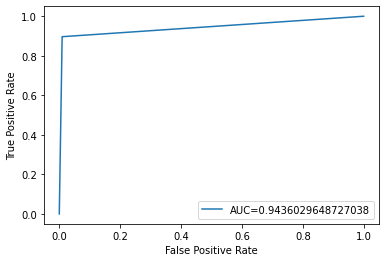

,F1,Precision_score,AUC,F1_independence,Precision_score_independence,AUC_independence
1.Basic_Param_FasText,0.9319,0.966841,0.943603,NaN,NaN,NaN


In [ ]:
lst_predict = []
for text in test_dataset.iloc[:, 0]:
  label, pro = model.predict(text)
  lst_predict.append(list(label))
lst_predict = pd.DataFrame(lst_predict)
y_test['spam'] = y_test['spam'].replace(['__label__1'],1)
y_test['spam'] = y_test['spam'].replace(['__label__0'],0)
lst_predict[0] = lst_predict[0].replace(['__label__1'],1)
lst_predict[0] = lst_predict[0].replace(['__label__0'],0)

f1 = f1_score(y_test, lst_predict, average='binary')
samples, precision_basic, recall = model.test('test.txt')


fpr, tpr, _ = metrics.roc_curve(y_test,  lst_predict)
auc = metrics.roc_auc_score(y_test, lst_predict)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

score['F1']['1.Basic_Param_FasText'] = f1
score['Precision_score']['1.Basic_Param_FasText'] = precision_basic
score['AUC']['1.Basic_Param_FasText'] = auc
report = pd.DataFrame(score)
report

## Test independence

In [ ]:
# test_dts = pd.read_csv('https://raw.githubusercontent.com/VuongDS/305/main/test_dts1.csv')
# test_dts = test_dts.rename(columns={'email': 'text'})

In [ ]:
test_dts = pd.read_csv('https://raw.githubusercontent.com/VuongDS/305/main/test_dts.csv', header = None)

In [ ]:
test_dts = test_dts.rename(columns={0: "text", 1: "label"})

In [ ]:
test_dts['text'] = test_dts['text'].str.lower()

In [ ]:
test_dts.iloc[:, 1] = test_dts.iloc[:, 1].apply(lambda x: '__label__' + str(x))

In [ ]:
y_test_dts = test_dts['label']

In [ ]:
test_dts['text'] = test_dts['text'].astype(str)

In [ ]:
test_dts[['label', 'text']].to_csv('test_independence.csv', 
                                        index = False, 
                                        sep = ' ',
                                        header = None, 
                                        quoting = csv.QUOTE_NONE, 
                                        quotechar = "", 
                                        escapechar = " ")

In [ ]:
y_test_dts = test_dts['label']

In [ ]:
y_test_dts.head()

0    __label__0
1    __label__0
2    __label__0
3    __label__1
4    __label__0
Name: label, dtype: object

In [ ]:
test_dts.iloc[:, 0]

0       subject: enron methanol ; meter # : 988291\r\n...
1       subject: hpl nom for january 9 , 2001\r\n( see...
2       subject: neon retreat\r\nho ho ho , we ' re ar...
3       subject: photoshop , windows , office . cheap ...
4       subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    subject: put the 10 on the ft\r\nthe transport...
5167    subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    subject: calpine daily gas nomination\r\n>\r\n...
5169    subject: industrial worksheets for august 2000...
5170    subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object

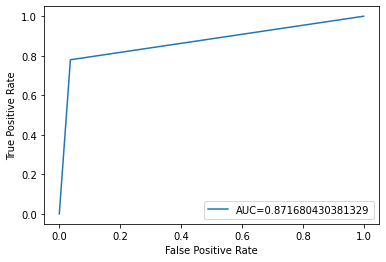

,F1,Precision_score,AUC,F1_independence,Precision_score_independence,AUC_independence
1.Basic_Param_FasText,0.9319,0.966841,0.943603,0.834404,0.777993,0.87168


In [ ]:
lst_predict = []
for text in test_dts.iloc[:, 0]:
  text = text.replace("\n"," ")
  label, pro = model.predict(text)
  lst_predict.append(list(label))
lst_predict = pd.DataFrame(lst_predict)
lst_predict[0] = lst_predict[0].replace(['__label__1'],1)
lst_predict[0] = lst_predict[0].replace(['__label__0'],0)
y_test_dts = y_test_dts.replace(['__label__1'],1)
y_test_dts = y_test_dts.replace(['__label__0'],0)
samples, precision_basic, recall = model.test('/content/test_independence.csv')

f1 = f1_score(y_test_dts, lst_predict, average='binary')
fpr, tpr, _ = metrics.roc_curve(y_test_dts,  lst_predict)
auc = metrics.roc_auc_score(y_test_dts, lst_predict)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


score['F1_independence']['1.Basic_Param_FasText'] = f1
score['Precision_score_independence']['1.Basic_Param_FasText'] = precision_basic
score['AUC_independence']['1.Basic_Param_FasText'] = auc

report = pd.DataFrame(score)
report

## Using LSTM pytorch

In [ ]:
import bz2
from collections import Counter
import re
import nltk
import numpy as np
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
X_train_lst = list(np.squeeze(X_train.iloc[:, 0]))
X_test_lst = list(np.squeeze(X_test.iloc[:, 0]))

In [ ]:
X_train_lst[0]

'subject: re : request for payroll reclassification - approved  joann ,  yes , sorry . 413 was the number on the form i received .  vince  enron property & services corp .  from : joann holloway 01 / 11 / 2000 02 : 01 pm  to : vince j kaminski / hou / ect @ ect  cc :  subject : re : request for payroll reclassification - approved  vince ,  on your reclass information , the company number indicated should be 0011 not  413 .  jo ann holloway  x 35957  vince j kaminski  01 / 11 / 2000 01 : 33 pm  to : stella l ely / hou / ect @ ect  cc : jeff kinneman / hou / ect @ ect , carmen chavira / hou / ect @ ect , michelle  hargrave / hou / ect @ ect , stephen wolfe / hou / ect @ ect , michael s  galvan / hou / ect @ ect , gary mccumber / hou / ect @ ect , billie  akhave / epsc / hou / ect @ ect , joann holloway / epsc / hou / ect @ ect , louis  allen / epsc / hou / ect @ ect , bradley stewart / hou / ect @ ect , carol coats / hou / ect @ ect  subject : request for payroll reclassification - appro

In [ ]:
y_train['spam'] = y_train['spam'].replace(['__label__1'],1)
y_train['spam'] = y_train['spam'].replace(['__label__0'],0)
y_test['spam'] = y_test['spam'].replace(['__label__1'],1)
y_test['spam'] = y_test['spam'].replace(['__label__0'],0)

In [ ]:
words = Counter() #Dictionary that will map a word to the number of times it appeared in all the training sentences
for i, sentence in enumerate(X_train_lst):
    #The sentences will be stored as a list of words/tokens
    X_train_lst[i] = []
    for word in nltk.word_tokenize(sentence): #Tokenizing the words
        words.update([word.lower()]) #Converting all the words to lower case
        X_train_lst[i].append(word)
print("100% done")

100% done


In [ ]:
# Removing the words that only appear once
words = {k:v for k,v in words.items() if v>1}
# Sorting the words according to the number of appearances, with the most common word being first
words = sorted(words, key=words.get, reverse=True)
# Adding padding and unknown to our vocabulary so that they will be assigned an index
words = ['_PAD','_UNK'] + words
# Dictionaries to store the word to index mappings and vice versa
word2idx = {o:i for i,o in enumerate(words)}
idx2word = {i:o for i,o in enumerate(words)}

In [ ]:
for i, sentence in enumerate(X_train_lst):
    # Looking up the mapping dictionary and assigning the index to the respective words
    X_train_lst[i] = [word2idx[word] if word in word2idx else word2idx['_UNK'] for word in sentence]

for i, sentence in enumerate(X_test_lst):
    # For test sentences, we have to tokenize the sentences as well
    X_test_lst[i] = [word2idx[word.lower()] if word.lower() in word2idx else word2idx['_UNK'] for word in nltk.word_tokenize(sentence)]

In [ ]:
# Defining a function that either shortens sentences or pads sentences with 0 to a fixed length

def pad_input(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

In [ ]:
seq_len = 50 #The length that the sentences will be padded/shortened to

train_sentences = pad_input(X_train_lst, seq_len)
test_sentences = pad_input(X_test_lst, seq_len)

In [ ]:
# Converting our labels into numpy arrays
train_labels = np.array(y_train)
test_labels = np.array(y_test)

In [ ]:
type(train_sentences)

numpy.ndarray

In [ ]:
split_frac = 0.5
split_id = int(split_frac * len(test_sentences))
val_sentences, test_sentences = test_sentences[:split_id], test_sentences[split_id:]
val_labels, test_labels = test_labels[:split_id], test_labels[split_id:]

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
train_data = TensorDataset(torch.from_numpy(train_sentences), torch.from_numpy(np.squeeze(train_labels)))
val_data = TensorDataset(torch.from_numpy(val_sentences), torch.from_numpy(np.squeeze(val_labels)))
test_data = TensorDataset(torch.from_numpy(test_sentences), torch.from_numpy(np.squeeze(test_labels)))

batch_size = 5

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True)
val_loader = DataLoader(val_data, shuffle=True, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size, drop_last=True)

In [ ]:
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print(sample_x.shape, sample_y.shape)

torch.Size([5, 50]) torch.Size([5])


In [ ]:
import torch.nn as nn

class SentimentNet(nn.Module):
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        super(SentimentNet, self).__init__()
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x, hidden):
        batch_size = x.size(0)
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        out = self.dropout(lstm_out)
        out = self.fc(out)
        out = self.sigmoid(out)
        
        out = out.view(batch_size, -1)
        out = out[:,-1]
        return out, hidden
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device))
        return hidden

In [ ]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU not available, CPU used


In [ ]:
vocab_size = len(word2idx) + 1
output_size = 1
embedding_dim = 400
hidden_dim = 512
n_layers = 2

model = SentimentNet(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
model.to(device)
print(model)

SentimentNet(
  (embedding): Embedding(20080, 400)
  (lstm): LSTM(400, 512, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [ ]:
lr=0.005
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
# epochs = 10
# counter = 0
# print_every = 1000
# clip = 5
# valid_loss_min = np.Inf

# model.train()
# for i in range(epochs):
#     h = model.init_hidden(batch_size)
    
#     for inputs, labels in train_loader:
#         counter += 1
#         h = tuple([e.data for e in h])
#         inputs, labels = inputs.to(device), labels.to(device)
#         model.zero_grad()
#         output, h = model(inputs, h)
#         # loss = criterion(output.squeeze(), labels.float())
#         loss = criterion(output.squeeze(), labels.float())
#         loss.backward()
#         nn.utils.clip_grad_norm_(model.parameters(), clip)
#         optimizer.step()
        
#         if counter%print_every == 0:
#             val_h = model.init_hidden(batch_size)
#             val_losses = []
#             model.eval()
#             for inp, lab in val_loader:
#                 val_h = tuple([each.data for each in val_h])
#                 inp, lab = inp.to(device), lab.to(device)
#                 out, val_h = model(inp, val_h)
#                 val_loss = criterion(out.squeeze(), lab.float())
#                 val_losses.append(val_loss.item())
                
#             model.train()
#             print("Epoch: {}/{}...".format(i+1, epochs),
#                   "Step: {}...".format(counter),
#                   "Loss: {:.6f}...".format(loss.item()),
#                   "Val Loss: {:.6f}".format(np.mean(val_losses)))
#             if np.mean(val_losses) <= valid_loss_min:
#                 torch.save(model.state_dict(), './state_dict_2.pt')
#                 print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,np.mean(val_losses)))
#                 valid_loss_min = np.mean(val_losses)

In [ ]:
## TYPE YOUR CODE for task 2 here:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
## TYPE YOUR CODE for task 3 here:
%%time
dataset_path = '/content/gdrive/MyDrive/DSp305/state_dict_2.pt'

!cp '{dataset_path}' .

CPU times: user 6.21 ms, sys: 57.9 ms, total: 64.1 ms
Wall time: 328 ms


In [ ]:
#Loading the best model
model.load_state_dict(torch.load('./state_dict_2.pt'))

<All keys matched successfully>

In [ ]:
pred_label = []
true_label = []
h = model.init_hidden(batch_size)

for inputs, labels in test_loader:
    h = tuple([each.data for each in h])
    inputs, labels = inputs.to(device), labels.to(device)
    output, h = model(inputs, h)
    pred = torch.round(output.squeeze()) #rounds the output to 0/1
    pred_label.append(pred.int())
    true_label.append(labels.int())
    # print(pred.float(), labels.float())

In [ ]:
tensor_pred = torch.tensor(())
for i in pred_label:
  tensor_pred = torch.cat((tensor_pred, i), 0)

tensor_true = torch.tensor(())
for i in true_label:
  tensor_true = torch.cat((tensor_true, i), 0)

In [ ]:
lst_pred = tensor_pred.tolist()
lst_true = tensor_true.tolist()

In [ ]:
score_basic_LSTM = f1_score(tensor_true, tensor_pred, average='binary')
auc = metrics.roc_auc_score(tensor_true, tensor_pred)
precision_basic = precision_score(tensor_true, tensor_pred, average='binary')

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
score['F1']['2.Basic_LSTM_Pytorch'] = score_basic_LSTM
score['Precision_score']['2.Basic_LSTM_Pytorch'] = precision_basic
score['AUC']['2.Basic_LSTM_Pytorch'] = auc

In [ ]:
report = pd.DataFrame(score)
report

,F1,Precision_score,AUC,F1_independence,Precision_score_independence,AUC_independence
1.Basic_Param_FasText,0.931900,0.966841,0.943603,0.834404,0.777993,0.87168
2.Basic_LSTM_Pytorch,0.900369,0.945736,0.921400,NaN,NaN,NaN


## Using LSTM pytorch independence

In [ ]:
import bz2
from collections import Counter
import re
import nltk
import numpy as np
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
X_train_lst = list(np.squeeze(X_train.iloc[:, 0]))
X_test_lst = list(np.squeeze(test_dts[['text']].iloc[:, 0]))

In [ ]:
X_train_lst[0]

'subject: re : request for payroll reclassification - approved  joann ,  yes , sorry . 413 was the number on the form i received .  vince  enron property & services corp .  from : joann holloway 01 / 11 / 2000 02 : 01 pm  to : vince j kaminski / hou / ect @ ect  cc :  subject : re : request for payroll reclassification - approved  vince ,  on your reclass information , the company number indicated should be 0011 not  413 .  jo ann holloway  x 35957  vince j kaminski  01 / 11 / 2000 01 : 33 pm  to : stella l ely / hou / ect @ ect  cc : jeff kinneman / hou / ect @ ect , carmen chavira / hou / ect @ ect , michelle  hargrave / hou / ect @ ect , stephen wolfe / hou / ect @ ect , michael s  galvan / hou / ect @ ect , gary mccumber / hou / ect @ ect , billie  akhave / epsc / hou / ect @ ect , joann holloway / epsc / hou / ect @ ect , louis  allen / epsc / hou / ect @ ect , bradley stewart / hou / ect @ ect , carol coats / hou / ect @ ect  subject : request for payroll reclassification - appro

In [ ]:
y_test = test_dts[['label']]
y_test = y_test.rename(columns={"label": "spam"})

In [ ]:
y_train['spam'] = y_train['spam'].replace(['__label__1'],1)
y_train['spam'] = y_train['spam'].replace(['__label__0'],0)
y_test['spam'] = y_test['spam'].replace(['__label__1'],1)
y_test['spam'] = y_test['spam'].replace(['__label__0'],0)

In [ ]:
words = Counter() #Dictionary that will map a word to the number of times it appeared in all the training sentences
for i, sentence in enumerate(X_train_lst):
    #The sentences will be stored as a list of words/tokens
    X_train_lst[i] = []
    for word in nltk.word_tokenize(sentence): #Tokenizing the words
        words.update([word.lower()]) #Converting all the words to lower case
        X_train_lst[i].append(word)
print("100% done")

100% done


In [ ]:
# Removing the words that only appear once
words = {k:v for k,v in words.items() if v>1}
# Sorting the words according to the number of appearances, with the most common word being first
words = sorted(words, key=words.get, reverse=True)
# Adding padding and unknown to our vocabulary so that they will be assigned an index
words = ['_PAD','_UNK'] + words
# Dictionaries to store the word to index mappings and vice versa
word2idx = {o:i for i,o in enumerate(words)}
idx2word = {i:o for i,o in enumerate(words)}

In [ ]:
for i, sentence in enumerate(X_train_lst):
    # Looking up the mapping dictionary and assigning the index to the respective words
    X_train_lst[i] = [word2idx[word] if word in word2idx else word2idx['_UNK'] for word in sentence]

for i, sentence in enumerate(X_test_lst):
    # For test sentences, we have to tokenize the sentences as well
    X_test_lst[i] = [word2idx[word.lower()] if word.lower() in word2idx else word2idx['_UNK'] for word in nltk.word_tokenize(sentence)]

In [ ]:
# Defining a function that either shortens sentences or pads sentences with 0 to a fixed length

def pad_input(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

In [ ]:
seq_len = 50 #The length that the sentences will be padded/shortened to

train_sentences = pad_input(X_train_lst, seq_len)
test_sentences = pad_input(X_test_lst, seq_len)

In [ ]:
# Converting our labels into numpy arrays
train_labels = np.array(y_train)
test_labels = np.array(y_test)

In [ ]:
type(train_sentences)

numpy.ndarray

In [ ]:
split_frac = 0.5
split_id = int(split_frac * len(test_sentences))
val_sentences, test_sentences = test_sentences[:split_id], test_sentences[split_id:]
val_labels, test_labels = test_labels[:split_id], test_labels[split_id:]

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
train_data = TensorDataset(torch.from_numpy(train_sentences), torch.from_numpy(np.squeeze(train_labels)))
val_data = TensorDataset(torch.from_numpy(val_sentences), torch.from_numpy(np.squeeze(val_labels)))
test_data = TensorDataset(torch.from_numpy(test_sentences), torch.from_numpy(np.squeeze(test_labels)))

batch_size = 5

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True)
val_loader = DataLoader(val_data, shuffle=True, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size, drop_last=True)

In [ ]:
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print(sample_x.shape, sample_y.shape)

torch.Size([5, 50]) torch.Size([5])


In [ ]:
import torch.nn as nn

class SentimentNet(nn.Module):
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        super(SentimentNet, self).__init__()
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x, hidden):
        batch_size = x.size(0)
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        out = self.dropout(lstm_out)
        out = self.fc(out)
        out = self.sigmoid(out)
        
        out = out.view(batch_size, -1)
        out = out[:,-1]
        return out, hidden
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device))
        return hidden

In [ ]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU not available, CPU used


In [ ]:
vocab_size = len(word2idx) + 1
output_size = 1
embedding_dim = 400
hidden_dim = 512
n_layers = 2

model = SentimentNet(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
model.to(device)
print(model)

SentimentNet(
  (embedding): Embedding(20080, 400)
  (lstm): LSTM(400, 512, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [ ]:
lr=0.005
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
# epochs = 10
# counter = 0
# print_every = 1000
# clip = 5
# valid_loss_min = np.Inf

# model.train()
# for i in range(epochs):
#     h = model.init_hidden(batch_size)
    
#     for inputs, labels in train_loader:
#         counter += 1
#         h = tuple([e.data for e in h])
#         inputs, labels = inputs.to(device), labels.to(device)
#         model.zero_grad()
#         output, h = model(inputs, h)
#         # loss = criterion(output.squeeze(), labels.float())
#         loss = criterion(output.squeeze(), labels.float())
#         loss.backward()
#         nn.utils.clip_grad_norm_(model.parameters(), clip)
#         optimizer.step()
        
#         if counter%print_every == 0:
#             val_h = model.init_hidden(batch_size)
#             val_losses = []
#             model.eval()
#             for inp, lab in val_loader:
#                 val_h = tuple([each.data for each in val_h])
#                 inp, lab = inp.to(device), lab.to(device)
#                 out, val_h = model(inp, val_h)
#                 val_loss = criterion(out.squeeze(), lab.float())
#                 val_losses.append(val_loss.item())
                
#             model.train()
#             print("Epoch: {}/{}...".format(i+1, epochs),
#                   "Step: {}...".format(counter),
#                   "Loss: {:.6f}...".format(loss.item()),
#                   "Val Loss: {:.6f}".format(np.mean(val_losses)))
#             if np.mean(val_losses) <= valid_loss_min:
#                 torch.save(model.state_dict(), './state_dict.pt')
#                 print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,np.mean(val_losses)))
#                 valid_loss_min = np.mean(val_losses)

In [ ]:
## TYPE YOUR CODE for task 2 here:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# ## TYPE YOUR CODE for task 3 here:
# %%time
# dataset_path = '/content/gdrive/MyDrive/DSp305/state_dict.pt'

# !cp '{dataset_path}' .

In [ ]:
#Loading the best model
model.load_state_dict(torch.load('./state_dict_2.pt'))

<All keys matched successfully>

In [ ]:
pred_label = []
true_label = []
h = model.init_hidden(batch_size)

for inputs, labels in test_loader:
    h = tuple([each.data for each in h])
    inputs, labels = inputs.to(device), labels.to(device)
    output, h = model(inputs, h)
    pred = torch.round(output.squeeze()) #rounds the output to 0/1
    pred_label.append(pred.int())
    true_label.append(labels.int())
    # print(pred.float(), labels.float())

In [ ]:
tensor_pred = torch.tensor(())
for i in pred_label:
  tensor_pred = torch.cat((tensor_pred, i), 0)

tensor_true = torch.tensor(())
for i in true_label:
  tensor_true = torch.cat((tensor_true, i), 0)

In [ ]:
lst_pred = tensor_pred.tolist()
lst_true = tensor_true.tolist()

In [ ]:
score_basic_LSTM = f1_score(tensor_true, tensor_pred, average='binary')
auc = metrics.roc_auc_score(tensor_true, tensor_pred)
precision_basic = precision_score(tensor_true, tensor_pred, average='binary')

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
score['F1_independence']['2.Basic_LSTM_Pytorch'] = score_basic_LSTM
score['Precision_score_independence']['2.Basic_LSTM_Pytorch'] = precision_basic
score['AUC_independence']['2.Basic_LSTM_Pytorch'] = auc

In [ ]:
report = pd.DataFrame(score)
report

,F1,Precision_score,AUC,F1_independence,Precision_score_independence,AUC_independence
1.Basic_Param_FasText,0.931900,0.966841,0.943603,0.834404,0.777993,0.87168
2.Basic_LSTM_Pytorch,0.900369,0.945736,0.921400,0.782166,0.780178,0.84408


## **Tuning**

In [ ]:
# wordNgramss = [2, 3, 4]
# lr = [1.3, 1.5, 1.7, 1.9, 2.1]
# epoch = [23, 25, 27, 29, 31]
# ws = [2, 4, 5, 6, 7, 8, 9, 10]

# best_f1 = 0

# for i_wordNgramss in wordNgramss:
#   for i_lr in lr:
#     for i_epoch in epoch:
#       for i_ws in ws:
#         print('wordNgrams: ',i_wordNgramss,'lr: ',i_lr,'i_epoch: ',i_epoch, 'i_ws: ',i_ws)
#         model_tune = fasttext.train_supervised(
#                                   'train.txt', 
#                                   wordNgrams = i_wordNgramss, # number of words in a unit train
#                                   lr = i_lr, # learning rate
#                                   epoch = i_epoch, # epoch
#                                   loss = 'hs', # hierarchical softmax, use for text classification, can speed up training
#                                   ws = i_ws # size of the context window
#                                   )
#         print(model_tune.test('test.txt'))
#         if model_tune.test('test.txt')[1] > best_f1:
#           best_f1 = model_tune.test('test.txt')[1]
#           best_wordNgrams = i_wordNgramss
#           best_lr = i_lr
#           best_epoch = i_epoch
#           best_ws = i_ws
# print('best_f1: ',best_f1, 'wordNgrams: ',best_wordNgrams, 'lr: ', best_lr, 'i_epoch: ',best_epoch, 'i_ws: ',best_ws)

In [ ]:
model_tune_word = fasttext.train_supervised(
                          'train.txt', 
                          wordNgrams = 3, # number of words in a unit train
                          lr = 1.9, # learning rate
                          ws = 8, # window size
                          epoch = 23, # epoch
                          loss = 'hs' # hierarchical softmax, 
                          # use for text classification, can speed up training
                          )
# lst_tune_predict = []
# for text in test_dataset.iloc[:, 0]:
#   label, pro = model.predict(text)
#   lst_tune_predict.append(list(label))

# lst_tune_predict = pd.DataFrame(lst_tune_predict)

# y_test['spam'] = y_test['spam'].replace(['__label__1'],1)
# y_test['spam'] = y_test['spam'].replace(['__label__0'],0)
# lst_tune_predict[0] = lst_tune_predict[0].replace(['__label__1'],1)
# lst_tune_predict[0] = lst_tune_predict[0].replace(['__label__0'],0)

# score = f1_score(y_test, lst_tune_predict, average='binary')
# score

In [ ]:
print(model_tune_word.test('test.txt'))
print(model_tune_word.test('/content/test_independence.csv'))

(1146, 0.9869109947643979, 0.9869109947643979)
(5171, 0.766196093598917, 0.766196093598917)


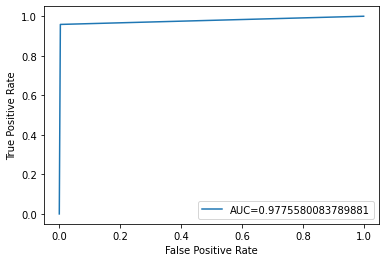

,F1,Precision_score,AUC,F1_independence,Precision_score_independence,AUC_independence
1.Basic_Param_FasText,0.931900,0.966841,0.943603,0.834404,0.777993,0.87168
2.Basic_LSTM_Pytorch,0.900369,0.945736,0.921400,0.782166,0.780178,0.84408
3.Tune_Word_Fasttext,0.973730,0.986911,0.977558,NaN,NaN,NaN


In [ ]:
lst_predict = []
for text in test_dataset.iloc[:, 0]:
  label, pro = model_tune_word.predict(text)
  lst_predict.append(list(label))
lst_predict = pd.DataFrame(lst_predict)
test_dataset['label'] = test_dataset['label'].replace(['__label__1'],1)
test_dataset['label'] = test_dataset['label'].replace(['__label__0'],0)
lst_predict[0] = lst_predict[0].replace(['__label__1'],1)
lst_predict[0] = lst_predict[0].replace(['__label__0'],0)

f1 = f1_score(test_dataset['label'], lst_predict, average='binary')
samples, precision_basic, recall = model_tune_word.test('test.txt')


fpr, tpr, _ = metrics.roc_curve(test_dataset['label'],  lst_predict)
auc = metrics.roc_auc_score(test_dataset['label'], lst_predict)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

score['F1']['3.Tune_Word_Fasttext'] = f1
score['Precision_score']['3.Tune_Word_Fasttext'] = precision_basic
score['AUC']['3.Tune_Word_Fasttext'] = auc
report = pd.DataFrame(score)
report

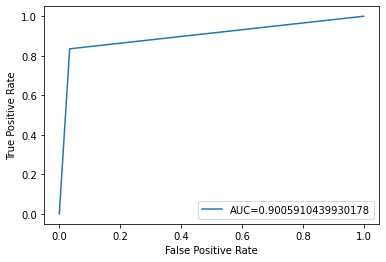

,F1,Precision_score,AUC,F1_independence,Precision_score_independence,AUC_independence
1.Basic_Param_FasText,0.931900,0.966841,0.943603,0.834404,0.777993,0.871680
2.Basic_LSTM_Pytorch,0.900369,0.945736,0.921400,0.782166,0.780178,0.844080
3.Tune_Word_Fasttext,0.973730,0.986911,0.977558,0.870654,0.766196,0.900591


In [ ]:
lst_predict = []
for text in test_dts.iloc[:, 0]:
  text = text.replace("\n"," ")
  label, pro = model_tune_word.predict(text)
  lst_predict.append(list(label))
lst_predict = pd.DataFrame(lst_predict)
lst_predict[0] = lst_predict[0].replace(['__label__1'],1)
lst_predict[0] = lst_predict[0].replace(['__label__0'],0)
test_dts['label'] = test_dts['label'].replace(['__label__1'],1)
test_dts['label'] = test_dts['label'].replace(['__label__0'],0)
samples, precision_basic, recall = model_tune_word.test('/content/test_independence.csv')

f1 = f1_score(test_dts['label'], lst_predict, average='binary')
fpr, tpr, _ = metrics.roc_curve(test_dts['label'],  lst_predict)
auc = metrics.roc_auc_score(test_dts['label'], lst_predict)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


score['F1_independence']['3.Tune_Word_Fasttext'] = f1
score['Precision_score_independence']['3.Tune_Word_Fasttext'] = precision_basic
score['AUC_independence']['3.Tune_Word_Fasttext'] = auc

report = pd.DataFrame(score)
report

In [ ]:
# f1['F1 score']['3.Tune_Word_Fasttext'] = score
# report = pd.DataFrame(f1)
# report

In [ ]:
# # char level
# wordNgramss = [1]
# lr = [1.3, 1.7, 1.9, 2.1]
# epoch = [23, 25, 29, 31]
# ws = [ 5, 7, 8, 10]
# char_ngram = [3, 5, 7, 9]

# best_f1 = 0

# for i_wordNgramss in wordNgramss:
#   for i_lr in lr:
#     for i_epoch in epoch:
#       for i_ws in ws:
#         for i_char in char_ngram:
#           print('wordNgrams: ',i_wordNgramss,'lr: ',i_lr,'i_epoch: ',i_epoch, 'i_ws: ',i_ws, 'i_char: ',i_char)
#           model_tune = fasttext.train_supervised(
#                                     'train.txt', 
#                                     wordNgrams = i_wordNgramss, # number of words in a unit train
#                                     lr = i_lr, # learning rate
#                                     epoch = i_epoch, # epoch
#                                     loss = 'hs', # hierarchical softmax, use for text classification, can speed up training
#                                     ws = i_ws, # size of the context window
#                                     minn = i_char, # min length of char ngrams
#                                     maxn = i_char # max length of char ngrams
#                                     )
#           print(model_tune.test('test.txt'))
#           if model_tune.test('test.txt')[1] > best_f1:
#             best_f1 = model_tune.test('test.txt')[1]
#             best_wordNgrams = i_wordNgramss
#             best_lr = i_lr
#             best_epoch = i_epoch
#             best_ws = i_ws
#             best_i_char = i_char
# print('best_f1: ',best_f1, 'wordNgrams: ',best_wordNgrams, 'lr: ', best_lr, 'i_epoch: ',best_epoch, 'i_ws: ',best_ws, 'best_char: ',best_i_char)

In [ ]:
model_char = fasttext.train_supervised(
                          'train.txt', 
                          wordNgrams = 1, # number of words in a unit train
                          lr = 1.7, # learning rate
                          epoch = 25, # epoch
                          ws = 5, # window size
                          minn = 5, # min length of char ngrams
                          maxn = 5 # max length of char ngrams
                          )

# lst_tune_char_predict = []
# for text in test_dataset.iloc[:, 0]:
#   label, pro = model.predict(text)
#   lst_tune_char_predict.append(list(label))

# lst_tune_char_predict = pd.DataFrame(lst_tune_char_predict)
# y_test['spam'] = y_test['spam'].replace(['__label__1'],1)
# y_test['spam'] = y_test['spam'].replace(['__label__0'],0)
# lst_tune_char_predict[0] = lst_tune_char_predict[0].replace(['__label__1'],1)
# lst_tune_char_predict[0] = lst_tune_char_predict[0].replace(['__label__0'],0)

# score = f1_score(y_test, lst_tune_char_predict, average='binary')
# score

In [ ]:
print(model_char.test('test.txt'))
print(model_char.test('/content/test_independence.csv'))

(1146, 0.993891797556719, 0.993891797556719)
(5171, 0.8147360278476117, 0.8147360278476117)


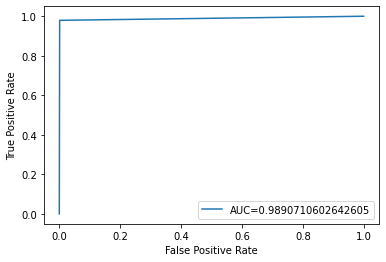

,F1,Precision_score,AUC,F1_independence,Precision_score_independence,AUC_independence
1.Basic_Param_FasText,0.931900,0.966841,0.943603,0.834404,0.777993,0.871680
2.Basic_LSTM_Pytorch,0.900369,0.945736,0.921400,0.782166,0.780178,0.844080
3.Tune_Word_Fasttext,0.973730,0.986911,0.977558,0.870654,0.766196,0.900591
4.Tune_Char_Fasttext,0.987826,0.993892,0.989071,NaN,NaN,NaN


In [ ]:
lst_predict_char = []
for text in test_dataset.iloc[:, 0]:
  label, pro = model_char.predict(text)
  lst_predict_char.append(list(label))
lst_predict_char = pd.DataFrame(lst_predict_char)
test_dataset['label'] = test_dataset['label'].replace(['__label__1'],1)
test_dataset['label'] = test_dataset['label'].replace(['__label__0'],0)
lst_predict_char[0] = lst_predict_char[0].replace(['__label__1'],1)
lst_predict_char[0] = lst_predict_char[0].replace(['__label__0'],0)

f1 = f1_score(test_dataset['label'], lst_predict_char, average='binary')
samples, precision_basic, recall = model_char.test('test.txt')


fpr, tpr, _ = metrics.roc_curve(test_dataset['label'],  lst_predict_char)
auc = metrics.roc_auc_score(test_dataset['label'], lst_predict_char)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

score['F1']['4.Tune_Char_Fasttext'] = f1
score['Precision_score']['4.Tune_Char_Fasttext'] = precision_basic
score['AUC']['4.Tune_Char_Fasttext'] = auc
report = pd.DataFrame(score)
report

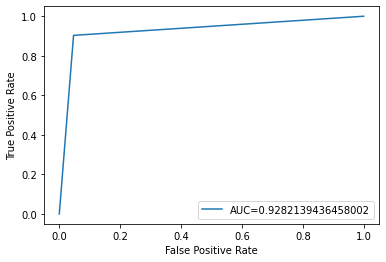

,F1,Precision_score,AUC,F1_independence,Precision_score_independence,AUC_independence
1.Basic_Param_FasText,0.931900,0.966841,0.943603,0.834404,0.777993,0.871680
2.Basic_LSTM_Pytorch,0.900369,0.945736,0.921400,0.782166,0.780178,0.844080
3.Tune_Word_Fasttext,0.973730,0.986911,0.977558,0.870654,0.766196,0.900591
4.Tune_Char_Fasttext,0.987826,0.993892,0.989071,0.895207,0.814736,0.928214


In [ ]:
lst_predict = []
for text in test_dts.iloc[:, 0]:
  text = text.replace("\n"," ")
  label, pro = model_char.predict(text)
  lst_predict.append(list(label))
lst_predict = pd.DataFrame(lst_predict)
lst_predict[0] = lst_predict[0].replace(['__label__1'],1)
lst_predict[0] = lst_predict[0].replace(['__label__0'],0)
test_dts['label'] = test_dts['label'].replace(['__label__1'],1)
test_dts['label'] = test_dts['label'].replace(['__label__0'],0)
samples, precision_basic, recall = model_char.test('/content/test_independence.csv')

f1 = f1_score(test_dts['label'], lst_predict, average='binary')
fpr, tpr, _ = metrics.roc_curve(test_dts['label'],  lst_predict)
auc = metrics.roc_auc_score(test_dts['label'], lst_predict)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


score['F1_independence']['4.Tune_Char_Fasttext'] = f1
score['Precision_score_independence']['4.Tune_Char_Fasttext'] = precision_basic
score['AUC_independence']['4.Tune_Char_Fasttext'] = auc

report = pd.DataFrame(score)
report

## Augmentation data

In [ ]:
X_train_au, X_test_au, y_train_au, y_test_au = train_test_split(email_ea['text'], email_ea['spam'], test_size = 0.20, random_state = 42)
X_train_au = pd.DataFrame(X_train_au)
X_test_au = pd.DataFrame(X_test_au)
y_train_au = pd.DataFrame(y_train_au)
y_test_au = pd.DataFrame(y_test_au)
y_train_au.iloc[:, 0] = y_train_au.iloc[:, 0].apply(lambda x: '__label__' + str(x))
y_test_au.iloc[:, 0] = y_test_au.iloc[:, 0].apply(lambda x: '__label__' + str(x))

In [ ]:
# my_transformation = CompositeTransformation([WordSwapRandomCharacterDeletion()])
# augmenter = Augmenter(transformation=my_transformation, transformations_per_example=3)


# def new_train(train_dts):
#   new_train_dts = []
#   for text in train_dts['text']:
#     new_train_dts.append(augmenter.augment(text))
    
#   new_train_dts = pd.DataFrame(np.ravel(new_train_dts))
#   return new_train_dts

In [ ]:
text = email_ea.loc[[907, 71, 2842, 2663, 538, 2905, 805, 4089, 4573, 79, 5408, 1411, 1086]]

In [ ]:
# X_train_au = new_train(X_train_au_1)

In [ ]:
# from textattack.augmentation import WordNetAugmenter
# wordnet_aug = WordNetAugmenter()

In [ ]:
# def new_train(train_dts):
#   new_train_dts = []
#   for text in train_dts['text']:
#     new_train_dts.append(wordnet_aug.augment(text))
    
#   new_train_dts = pd.DataFrame(np.ravel(new_train_dts))
#   return new_train_dts

In [ ]:
# au = new_train(text)

In [ ]:
## TYPE YOUR CODE for task 2 here:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
## TYPE YOUR CODE for task 3 here:
%%time
dataset_path = '/content/gdrive/MyDrive/DSp305/train_au_final.csv'

!cp '{dataset_path}' .

CPU times: user 11 ms, sys: 65.9 ms, total: 76.9 ms
Wall time: 835 ms


In [ ]:
!wget -q https://raw.githubusercontent.com/VuongDS/305/main/train_au_final.csv

In [ ]:
# dts_au = pd.read_csv('/content/train_au_final.csv', header = None)
# dts_au = dts_au.rename(columns={0: "text", 1: "spam"})
dts_au = pd.read_csv('/content/gdrive/MyDrive/DSp305/train_au_final_1.csv')

In [ ]:
dts_au.shape

(33670, 2)

In [ ]:
dts_au['spam'].value_counts()

1    17171
0    16499
Name: spam, dtype: int64

In [ ]:
dts_au['text'] = dts_au['text'].str.lower()

In [ ]:
dts_au.head(3)

,text,spam
0,"gary , production from the high island larger ...",0
1,- calpine daily gas nomination 1 . doc,0
2,fyi - see note below - already done .\nstella\...,0


In [ ]:
X_train_au = X_train_au.append(dts_au[['text']], ignore_index=True)

In [ ]:
X_train_au

,text
0,subject: re : request for payroll reclassifica...
1,subject: re : pending approval for ibuyit requ...
2,subject: congratulations ! hi vince : i just...
3,subject: secretly record all internet activity...
4,"subject: interviews scheduled for monday , nov..."
...,...
38247,"hello , welcome to gigapharm onlinne shop .\np..."
38248,i got it earlier than expected and it was wrap...
38249,are you ready to rock on ? let the man in you ...
38250,learn how to last 5 - 10 times longer in\nbed ...


In [ ]:
dts_au['spam'] = dts_au['spam'].apply(lambda x: '__label__' + str(x))

In [ ]:
X_train_au.shape

(38252, 1)

In [ ]:
y_train_au = y_train_au.append(dts_au[['spam']], ignore_index=True)

In [ ]:
# Create train/test dataset
X_train_au[['label']] = y_train_au
X_test_au[['label']] = y_test_au
train_dataset = X_train_au
test_dataset = X_test_au

# Convert dataset to CSV file
train_dataset[['label', 'text']].to_csv('train.txt', 
                                        index = False, 
                                        sep = ' ',
                                        header = None, 
                                        quoting = csv.QUOTE_NONE, 
                                        quotechar = "", 
                                        escapechar = " ")

test_dataset[['label', 'text']].to_csv('test.txt', 
                                        index = False, 
                                        sep = ' ',
                                        header = None, 
                                        quoting = csv.QUOTE_NONE, 
                                        quotechar = "", 
                                        escapechar = " ")

In [ ]:
# Convert dataset to CSV file
# dts_au.to_csv('train_au_final.csv', 
#                   index = False, 
#                   sep = ',',
#                   header = None, 
#                   quoting = csv.QUOTE_NONE, 
#                   quotechar = "", 
#                   escapechar = " ")

## train after analyse fasttext

In [ ]:
# wordNgramss = [2, 3, 4]
# lr = [0.3, 0.5, 0.7, 1.3, 1.5, 1.7, 1.9, 2.1]
# epoch = [23, 25, 27]
# # ws = [2, 4, 5, 6, 7, 8, 9, 10]

# best_f1 = 0

# for i_wordNgramss in wordNgramss:
#   for i_lr in lr:
#     for i_epoch in epoch:
#       # for i_ws in ws:
#         # print('wordNgrams: ',i_wordNgramss,'lr: ',i_lr,'i_epoch: ',i_epoch, 'i_ws: ',i_ws)
#         print('wordNgrams: ',i_wordNgramss,'lr: ',i_lr,'i_epoch: ',i_epoch)
#         model_tune = fasttext.train_supervised(
#                                   'train.txt', 
#                                   wordNgrams = i_wordNgramss, # number of words in a unit train
#                                   lr = i_lr, # learning rate
#                                   epoch = i_epoch, # epoch
#                                   loss = 'hs' # hierarchical softmax, use for text classification, can speed up training
#                                   # ws = i_ws # size of the context window
#                                   )
#         lst_tune_char_predict_ea = []
#         for text in test_dataset.iloc[:, 0]:
#           label, pro = model_tune.predict(text)
#           lst_tune_char_predict_ea.append(list(label))

#         lst_tune_char_predict_ea = pd.DataFrame(lst_tune_char_predict_ea)
#         y_test_au['spam'] = y_test_au['spam'].replace(['__label__1'],1)
#         y_test_au['spam'] = y_test_au['spam'].replace(['__label__0'],0)
#         lst_tune_char_predict_ea[0] = lst_tune_char_predict_ea[0].replace(['__label__1'],1)
#         lst_tune_char_predict_ea[0] = lst_tune_char_predict_ea[0].replace(['__label__0'],0)
#         f1 = f1_score(y_test_au, lst_tune_char_predict_ea, average='binary')


#         print(f1)
#         if f1 > best_f1:
#           best_f1 = f1
#           best_wordNgrams = i_wordNgramss
#           best_lr = i_lr
#           best_epoch = i_epoch
#           # best_ws = i_ws
# # print('best_f1: ',best_f1, 'wordNgrams: ',best_wordNgrams, 'lr: ', best_lr, 'i_epoch: ',best_epoch, 'i_ws: ',best_ws)
# print('best_f1: ',best_f1, 'wordNgrams: ',best_wordNgrams, 'lr: ', best_lr, 'i_epoch: ',best_epoch)

In [ ]:
# ws = [2, 4, 5, 6, 7, 8, 9, 10]

# best_f1 = 0


# for i_ws in ws:
#   print('i_ws: ',i_ws)
#   model_tune = fasttext.train_supervised(
#                             'train.txt', 
#                             wordNgrams = 2, # number of words in a unit train
#                             lr = 1.9, # learning rate
#                             epoch = 25, # epoch
#                             loss = 'hs', # hierarchical softmax, use for text classification, can speed up training
#                             ws = i_ws # size of the context window
#                             )
#   lst_tune_char_predict_ea = []
#   for text in test_dataset.iloc[:, 0]:
#     label, pro = model_tune.predict(text)
#     lst_tune_char_predict_ea.append(list(label))

#   lst_tune_char_predict_ea = pd.DataFrame(lst_tune_char_predict_ea)
#   y_test_au['spam'] = y_test_au['spam'].replace(['__label__1'],1)
#   y_test_au['spam'] = y_test_au['spam'].replace(['__label__0'],0)
#   lst_tune_char_predict_ea[0] = lst_tune_char_predict_ea[0].replace(['__label__1'],1)
#   lst_tune_char_predict_ea[0] = lst_tune_char_predict_ea[0].replace(['__label__0'],0)
#   f1 = f1_score(y_test_au, lst_tune_char_predict_ea, average='binary')


#   print(f1)
#   if f1 > best_f1:
#     best_ws = i_ws
# print('best_f1: ', best_f1, 'i_ws: ', best_ws)
# # print('best_f1: ',best_f1, 'wordNgrams: ',best_wordNgrams, 'lr: ', best_lr, 'i_epoch: ',best_epoch)

In [ ]:
# lst_tune_predict_ea.value_counts()

In [ ]:
model_ea = fasttext.train_supervised(
                          'train.txt', 
                          wordNgrams = 1, # number of words in a unit train
                          lr = 0.1, # learning rate
                          ws = 5, # window size
                          epoch = 10, # epoch
                          loss = 'hs' # hierarchical softmax, use for text classification, can speed up training
                          )

# lst_tune_predict_ea = []
# for text in test_dataset.iloc[:, 0]:
#   label, pro = model_tune.predict(text)
#   lst_tune_predict_ea.append(list(label))

# lst_tune_predict_ea = pd.DataFrame(lst_tune_predict_ea)
# y_test_au['spam'] = y_test_au['spam'].replace(['__label__1'],1)
# y_test_au['spam'] = y_test_au['spam'].replace(['__label__0'],0)
# lst_tune_predict_ea[0] = lst_tune_predict_ea[0].replace(['__label__1'],1)
# lst_tune_predict_ea[0] = lst_tune_predict_ea[0].replace(['__label__0'],0)
# score = f1_score(y_test_au, lst_tune_predict_ea, average='binary')

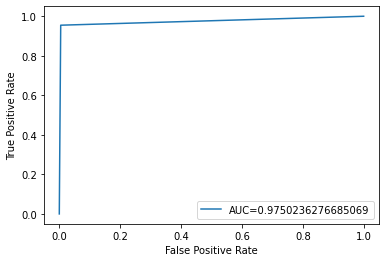

,F1,Precision_score,AUC,F1_independence,Precision_score_independence,AUC_independence
1.Basic_Param_FasText,0.931900,0.966841,0.943603,0.834404,0.777993,0.871680
2.Basic_LSTM_Pytorch,0.900369,0.945736,0.921400,0.782166,0.780178,0.844080
3.Tune_Word_Fasttext,0.973730,0.986911,0.977558,0.870654,0.766196,0.900591
4.Tune_Char_Fasttext,0.987826,0.993892,0.989071,0.895207,0.814736,0.928214
5.Error_Analysis_Word_Fasttext,0.985166,0.985166,0.975024,NaN,NaN,NaN


In [ ]:
lst_predict = []
for text in test_dataset.iloc[:, 0]:
  label, pro = model_ea.predict(text)
  lst_predict.append(list(label))
lst_predict = pd.DataFrame(lst_predict)
test_dataset['label'] = test_dataset['label'].replace(['__label__1'],1)
test_dataset['label'] = test_dataset['label'].replace(['__label__0'],0)
lst_predict[0] = lst_predict[0].replace(['__label__1'],1)
lst_predict[0] = lst_predict[0].replace(['__label__0'],0)

f1 = f1_score(test_dataset['label'], lst_predict, average='binary')
samples, precision_basic, recall = model_ea.test('test.txt')


fpr, tpr, _ = metrics.roc_curve(test_dataset['label'],  lst_predict)
auc = metrics.roc_auc_score(test_dataset['label'], lst_predict)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

score['F1']['5.Error_Analysis_Word_Fasttext'] = precision_basic
score['Precision_score']['5.Error_Analysis_Word_Fasttext'] = precision_basic
score['AUC']['5.Error_Analysis_Word_Fasttext'] = auc
report = pd.DataFrame(score)
report

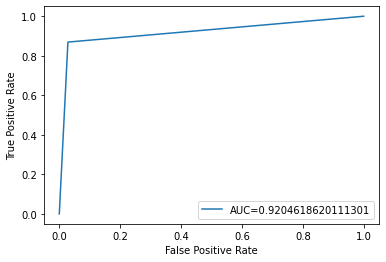

,F1,Precision_score,AUC,F1_independence,Precision_score_independence,AUC_independence
1.Basic_Param_FasText,0.931900,0.966841,0.943603,0.834404,0.777993,0.871680
2.Basic_LSTM_Pytorch,0.900369,0.945736,0.921400,0.782166,0.780178,0.844080
3.Tune_Word_Fasttext,0.973730,0.986911,0.977558,0.870654,0.766196,0.900591
4.Tune_Char_Fasttext,0.987826,0.993892,0.989071,0.895207,0.814736,0.928214
5.Error_Analysis_Word_Fasttext,0.985166,0.985166,0.975024,0.896765,0.781474,0.920462


In [ ]:
lst_predict = []
for text in test_dts.iloc[:, 0]:
  text = text.replace("\n"," ")
  label, pro = model_ea.predict(text)
  lst_predict.append(list(label))
lst_predict = pd.DataFrame(lst_predict)
lst_predict[0] = lst_predict[0].replace(['__label__1'],1)
lst_predict[0] = lst_predict[0].replace(['__label__0'],0)
test_dts['label'] = test_dts['label'].replace(['__label__1'],1)
test_dts['label'] = test_dts['label'].replace(['__label__0'],0)
samples, precision_basic, recall = model_ea.test('/content/test_independence.csv')

f1 = f1_score(test_dts['label'], lst_predict, average='binary')
fpr, tpr, _ = metrics.roc_curve(test_dts['label'],  lst_predict)
auc = metrics.roc_auc_score(test_dts['label'], lst_predict)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


score['F1_independence']['5.Error_Analysis_Word_Fasttext'] = f1
score['Precision_score_independence']['5.Error_Analysis_Word_Fasttext'] = precision_basic
score['AUC_independence']['5.Error_Analysis_Word_Fasttext'] = auc

report = pd.DataFrame(score)
report

In [ ]:
# f1['F1 score']['5.Error_Analysis_Word_Fasttext'] = score
# report = pd.DataFrame(f1)
# report

In [ ]:
# for i in y_test_au['spam']:
# for i in lst_tune_predict_ea[0]:
#   print(i )

In [ ]:
# y_test.index[295]

In [ ]:
# email_raw.iloc[[5408]]

In [ ]:
# for i in email_raw.iloc[[5408]]['text']:
#   print(i)

In [ ]:
# #char level
# wordNgramss = [1]
# lr = [1.5, 1.9, 2.1]
# epoch = [ 25, 27, 29, 31]
# ws = [8]
# char_ngram = [ 4, 6, 8, 10]

# best_f1 = 0

# for i_wordNgramss in wordNgramss:
#   for i_lr in lr:
#     for i_epoch in epoch:
#       for i_ws in ws:
#         for i_char in char_ngram:
#           print('wordNgrams: ',i_wordNgramss,'lr: ',i_lr,'i_epoch: ',i_epoch, 'i_ws: ',i_ws, 'i_char: ',i_char)
#           model_tune = fasttext.train_supervised(
#                                     'train.txt', 
#                                     wordNgrams = i_wordNgramss, # number of words in a unit train
#                                     lr = i_lr, # learning rate
#                                     epoch = i_epoch, # epoch
#                                     loss = 'hs', # hierarchical softmax, use for text classification, can speed up training
#                                     ws = i_ws, # size of the context window
#                                     minn = i_char, # min length of char ngrams
#                                     maxn = i_char # max length of char ngrams
#                                     )
#           print(model_tune.test('test.txt'))
#           if model_tune.test('test.txt')[1] > best_f1:
#             best_f1 = model_tune.test('test.txt')[1]
#             best_wordNgrams = i_wordNgramss
#             best_lr = i_lr
#             best_epoch = i_epoch
#             best_ws = i_ws
#             best_i_char = i_char
# print('best_f1: ',best_f1, 'wordNgrams: ',best_wordNgrams, 'lr: ', best_lr, 'i_epoch: ',best_epoch, 'i_ws: ',best_ws, 'best_char: ',best_i_char)

In [ ]:
model_ea_char = fasttext.train_supervised(
                          'train.txt', 
                          wordNgrams = 1, # number of words in a unit train
                          lr = 1, # learning rate
                          epoch = 25, # epoch
                          ws = 8, # window size
                          minn = 8, # min length of char ngrams
                          maxn = 8 # max length of char ngrams
                          )

# lst_tune_char_predict = []
# for text in test_dataset.iloc[:, 0]:
#   label, pro = model_char_tune.predict(text)
#   lst_tune_char_predict.append(list(label))

# lst_tune_char_predict = pd.DataFrame(lst_tune_char_predict)
# y_test_au['spam'] = y_test_au['spam'].replace(['__label__1'],1)
# y_test_au['spam'] = y_test_au['spam'].replace(['__label__0'],0)
# lst_tune_char_predict[0] = lst_tune_char_predict[0].replace(['__label__1', '__label__1.0'],1)
# lst_tune_char_predict[0] = lst_tune_char_predict[0].replace(['__label__0', '__label__0.0'],0)

# score = f1_score(y_test_au, lst_tune_char_predict, average='binary')

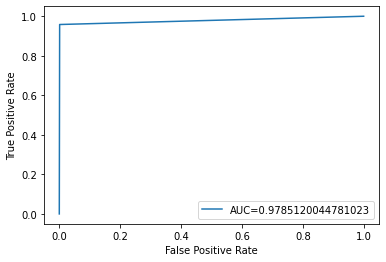

,F1,Precision_score,AUC,F1_independence,Precision_score_independence,AUC_independence
1.Basic_Param_FasText,0.931900,0.966841,0.943603,0.834404,0.777993,0.871680
2.Basic_LSTM_Pytorch,0.900369,0.945736,0.921400,0.782166,0.780178,0.844080
3.Tune_Word_Fasttext,0.973730,0.986911,0.977558,0.870654,0.766196,0.900591
4.Tune_Char_Fasttext,0.987826,0.993892,0.989071,0.895207,0.814736,0.928214
5.Error_Analysis_Word_Fasttext,0.985166,0.985166,0.975024,0.896765,0.781474,0.920462
6.Error_Analysis_Char_Fasttext,0.988656,0.988656,0.978512,NaN,NaN,NaN


In [ ]:
lst_predict = []
for text in test_dataset.iloc[:, 0]:
  label, pro = model_ea_char.predict(text)
  lst_predict.append(list(label))
lst_predict = pd.DataFrame(lst_predict)
test_dataset['label'] = test_dataset['label'].replace(['__label__1'],1)
test_dataset['label'] = test_dataset['label'].replace(['__label__0'],0)
lst_predict[0] = lst_predict[0].replace(['__label__1'],1)
lst_predict[0] = lst_predict[0].replace(['__label__0'],0)

f1 = f1_score(test_dataset['label'], lst_predict, average='binary')
samples, precision_basic, recall = model_ea_char.test('test.txt')


fpr, tpr, _ = metrics.roc_curve(test_dataset['label'],  lst_predict)
auc = metrics.roc_auc_score(test_dataset['label'], lst_predict)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

score['F1']['6.Error_Analysis_Char_Fasttext'] = precision_basic
score['Precision_score']['6.Error_Analysis_Char_Fasttext'] = precision_basic
score['AUC']['6.Error_Analysis_Char_Fasttext'] = auc
report = pd.DataFrame(score)
report

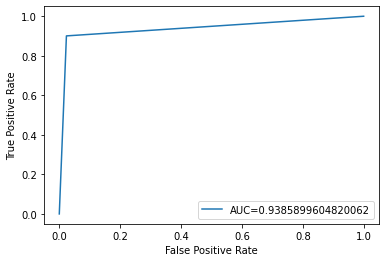

,F1,Precision_score,AUC,F1_independence,Precision_score_independence,AUC_independence
1.Basic_Param_FasText,0.931900,0.966841,0.943603,0.834404,0.777993,0.871680
2.Basic_LSTM_Pytorch,0.900369,0.945736,0.921400,0.782166,0.780178,0.844080
3.Tune_Word_Fasttext,0.973730,0.986911,0.977558,0.870654,0.766196,0.900591
4.Tune_Char_Fasttext,0.987826,0.993892,0.989071,0.895207,0.814736,0.928214
5.Error_Analysis_Word_Fasttext,0.985166,0.985166,0.975024,0.896765,0.781474,0.920462
6.Error_Analysis_Char_Fasttext,0.988656,0.988656,0.978512,0.919932,0.817637,0.938590


In [ ]:
lst_predict = []
for text in test_dts.iloc[:, 0]:
  text = text.replace("\n"," ")
  label, pro = model_ea_char.predict(text)
  lst_predict.append(list(label))
lst_predict = pd.DataFrame(lst_predict)
lst_predict[0] = lst_predict[0].replace(['__label__1'],1)
lst_predict[0] = lst_predict[0].replace(['__label__0'],0)
test_dts['label'] = test_dts['label'].replace(['__label__1'],1)
test_dts['label'] = test_dts['label'].replace(['__label__0'],0)
samples, precision_basic, recall = model_ea_char.test('/content/test_independence.csv')

f1 = f1_score(test_dts['label'], lst_predict, average='binary')
fpr, tpr, _ = metrics.roc_curve(test_dts['label'],  lst_predict)
auc = metrics.roc_auc_score(test_dts['label'], lst_predict)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


score['F1_independence']['6.Error_Analysis_Char_Fasttext'] = f1
score['Precision_score_independence']['6.Error_Analysis_Char_Fasttext'] = precision_basic
score['AUC_independence']['6.Error_Analysis_Char_Fasttext'] = auc

report = pd.DataFrame(score)
report

In [ ]:
# for i in y_test_au['spam']:
# for i in lst_tune_char_predict[0]:
#   print(i )

In [ ]:
# y_test.index[45]

In [ ]:
# email_ea.iloc[[1181]]

In [ ]:
# for i in email_ea.iloc[[1181]]['text']:
#   print(i)

## report

In [ ]:
report

,F1,Precision_score,AUC,F1_independence,Precision_score_independence,AUC_independence
1.Basic_Param_FasText,0.931900,0.966841,0.943603,0.834404,0.777993,0.871680
2.Basic_LSTM_Pytorch,0.900369,0.945736,0.921400,0.782166,0.780178,0.844080
3.Tune_Word_Fasttext,0.973730,0.986911,0.977558,0.870654,0.766196,0.900591
4.Tune_Char_Fasttext,0.987826,0.993892,0.989071,0.895207,0.814736,0.928214
5.Error_Analysis_Word_Fasttext,0.985166,0.985166,0.975024,0.896765,0.781474,0.920462
6.Error_Analysis_Char_Fasttext,0.988656,0.988656,0.978512,0.919932,0.817637,0.938590
